<div class="alert alert-block alert-info">   

# BABS 502 Project  
#### Instructor: Martha Essak  

</div>

## Instructions and reminders for Jupyter notebooks

**Add markdown and code cells as needed to complete your project.** Please do not modify the headings of the sections.

Helpful notes abouts markdown in Jupyter to get you started:
* When you have a cell selected (by clicking on the white space to the left of the cell) in Command mode (blue box around the cell), press `a` or `b` to add a cell "above" or "below"
* In Command mode, press `d` twice to delete the cell. Press z to undo deleting a cell
* In Command mode, press `m` to change a code cell to a markdown cell, or press `y` to change a markdown cell to a code cell
* In Command mode, press `x` to cut cell, `c` to copy cell, and `v` to paste cell below the selected cell
  
* Double click a cell to enter Edit mode (green box around the cell), or press `Enter`
* Add two empty spaces at the end of a line to add a line break
* Press `shift + enter` to execute a cell to see either the formatted version (for a markdown cell) or to run the code (for a code cell). This will cause you to leave edit mode.
* Press `Ctrl + Shift + -` to split the current cell into two cells where the cursor is
* Press `Shift + m` to merge multiple cells. You can use `Shift + up arrow` or `Shift + down` arrow to select multiple cells.



[See cheat sheet for Markdown in Jupyter for more details](https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd)

### Names of students:
<code style="background:yellow;color:black">
Fill in student names below, then remove the highlighting by deleting the code style.  
<br>
Julia Krumgant 40566465  
Pranav Mehta 19184282 
</code> 

---

## Table of Contents
[Project description](#Description)  
[Part A: Time plot, trying transformations/adjustments, creating training and test set](#PartA)  
[Part B](#PartB)  
[Introduction & Approach](#Introduction)  
[Exploratory Data Analysis](#EDA1)  
[Potential causes of patterns](#Causes)   
[Exponential Smoothing Model](#ETS)  
[ARIMA model](#ARIMA)  
[Comparison of models](#Compare)  
[Forecasts](#Forecast)  
[Discussion](#Discussion)  


[Appendix A: ETS Models](#AppendixA)  
[Appendix B: ARIMA Models](#AppendixB)

---

<div class="alert alert-block alert-info">   
<a id="Description"></a>

# Project description

**Objective**  

The main goal of this project is to develop a model to forecast monthly energy use for the Vancouver International Airport (YVR).  

<br>

**Introduction**  

Budget planning at YVR requires forecasting the cost of energy to operate the airport. An accurate forecast could help the YVR representatives negotiate more favourable contracts with energy suppliers.

<br>

**Data Available**  

Data was taken from 14 years of records from the YVR database. This data set includes information on date, energy use, temperature, terminal area, and number of passengers. Data have been aggregated by month into 168 records (14 years with 12 months each).  

<br>


| # | Variable | Definition |  
| :- | :- | :- |  
| 1 | month | Month and year, e.g.: Nov-98 |
| 2 | energy | Energy use measured in thousands of kilowatt hours (kWh) |
| 3 | mean.temp | Mean monthly temperature outside (degrees Celsius) |
| 4 | total.area | Total area of all terminals (sq. m.) |
| 5 | total.passengers | Total number of passengers in thousands |
| 6 | domestic.passengers | Total number of domestic passengers (traveling within Canada) in thousands |
| 7 | US.passengers | Total number of passengers traveling between Canada and the US in thousands |
| 8 | international.passengers | Total number of passengers traveling between YVR and countries other than Canada/US |


In this project, you will develop appropriate models, compare the models, and discuss advantages and limitations of each model. You should select the best model and use it to provide monthly forecasts for energy use for the next three years (January 2011 through December 2013).   
    </div>

---

<div class="alert alert-block alert-info">   

# Part A (3.5 marks)
## Time plot, trying transformations/adjustments, creating training and test set
### See Canvas submission called "Project: Part A" for detailed questions and points breakdown.
<a id="PartA"></a>  

</div>


### Import the data
Create a time series object of the energy use. See the steps on Canvas if you aren't sure how to create a time series object in R.

In [1]:
energy_data <- read.csv("Energy use at YVR.csv")
energy_ts = ts(energy_data[,2],start = c(1997,1),frequency = 12)
energy_ts

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1997,5958,5859,5230,5654,5618,5963,5920,6430,6053,5514,5633,5545
1998,5825,5617,4970,5331,5233,5557,5841,6489,6138,5539,5667,5730
1999,6030,5954,5326,5672,5301,5777,5831,6345,6309,6068,6372,6302
2000,6570,6497,6106,6330,6070,6401,6697,7003,6760,6192,6334,6371
2001,6501,6435,5674,6206,6094,6544,6602,6886,6677,6133,6088,6291
2002,6349,6286,5588,5914,5716,6235,6483,6708,6553,5837,5961,5828
2003,6126,6020,5375,5741,5635,6199,6376,6844,6379,5822,5884,5820
2004,6105,6014,5552,5908,5956,6399,6572,7043,6418,5741,6497,6207
2005,6504,6337,5644,6148,6141,6521,6661,7387,6815,6173,6319,6434
2006,6544,6534,5809,6290,6202,6492,6733,7040,6690,6220,6497,6582


In [3]:
options(repr.plot.width=12, repr.plot.height=6)


### Time plot (0.5 marks)
Create a time plot of the electricity use data. Prepare this plot as if for publication and upload the image to Canvas. You do not have to describe the plot.

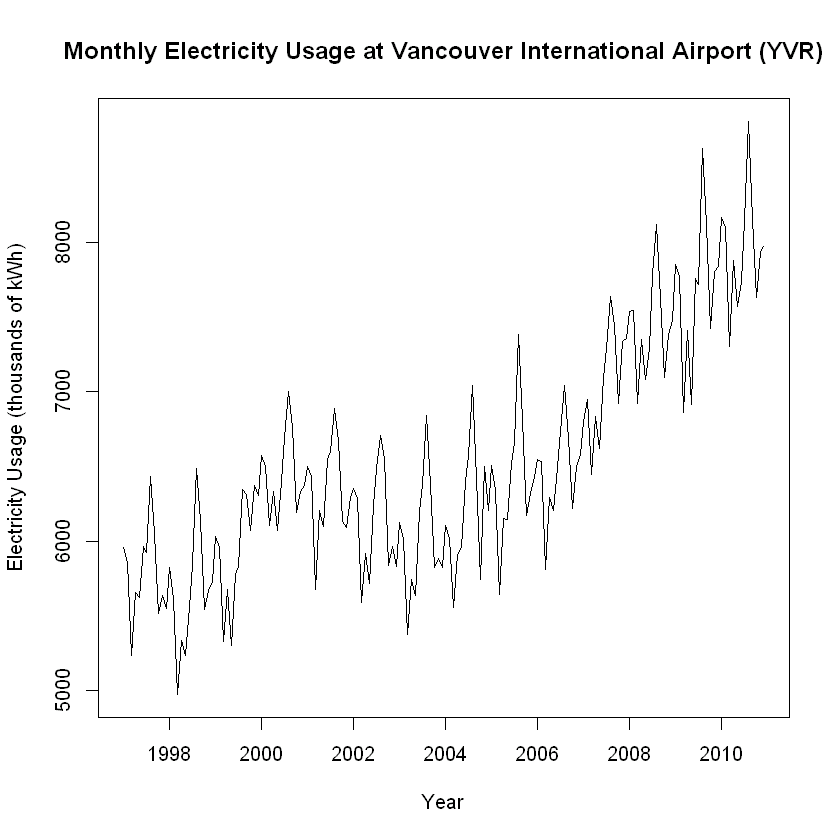

In [3]:
# Create a time plot
plot(energy_ts,
     xlab = "Year",
     ylab = "Electricity Usage (thousands of kWh)",
     main = "Monthly Electricity Usage at Vancouver International Airport (YVR)",
) 


### Box-Cox transformation (1 mark)
Write the code to do a Box-Cox transformation of the electricity use data (this will be submitted as part of the last question for Part A of the project).

Create a time plot of the transformed data. Prepare this plot as if for publication and upload the image.

Explain the purpose of using the Box-Cox transformation and if it was effective for this dataset (5 sentences max).

The Box-Cox transformation is used to stabilize variance, make data more normally distributed, and improve forecasting accuracy in time series models. In our case, after applying the transformation, the scale of values decreases from 5,000–8,000 kWh to 550–750 kWh, resulting in a narrower range. However, the plot does not show clear improvement in variance stabilization or forecasting accuracy. This could mean that the model does not benefit from the transformation. Other factors like data noise, seasonality, or an alternative transformation method may need to be considered.

Warning message:
"package 'forecast' was built under R version 4.4.2"
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



[1] 0.6931483

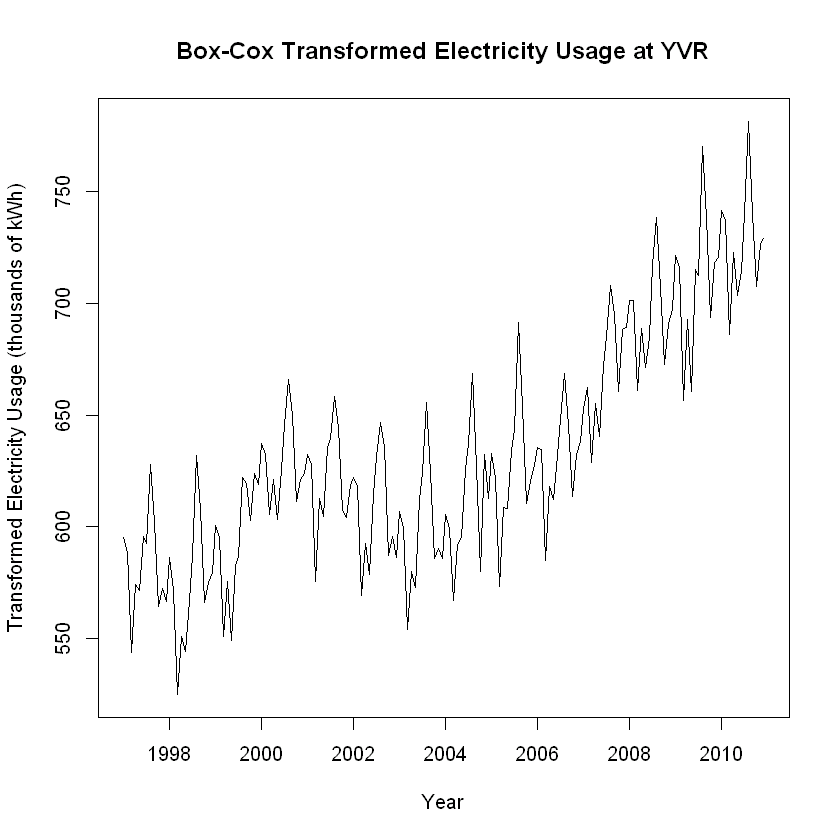

In [6]:
library(forecast)
# Perform Box-Cox transformation
lambda <- BoxCox.lambda(energy_ts)
lambda
plot(BoxCox(energy_ts, lambda),
     ylab = "Transformed Electricity Usage (thousands of kWh)",
     xlab = "Year",
     main = "Box-Cox Transformed Electricity Usage at YVR",
)


### Calendar adjustment for number of days in each month (1 mark)
Write the code to do a calendar adjustment based on number of days in each month for the electricity use data - use the original data, not the transformed data (this code will be submitted as part of the last question for Part A of the project).

Create a time plot of the calendar adjusted data. Prepare this plot as if for publication and upload the image.

Explain the purpose of using this calendar adjustment and if it was effective for this dataset (5 sentences max).

Calendar adjustment helps account for differences in month lengths, ensuring a more accurate analysis of energy consumption trends.  Comparing the original and calendar-adjusted electricity use graphs, the overall trend remains similar, but seasonal fluctuations become clearer. In the unadjusted graph, energy use increases over time with noticeable ups and downs, which may be influenced by the number of days in each month. After applying calendar adjustment, the seasonal patterns appear more consistent, with a more even level of fluctuation across months. This adjustment helps remove distortions caused by varying month lengths, making trends easier to interpret.

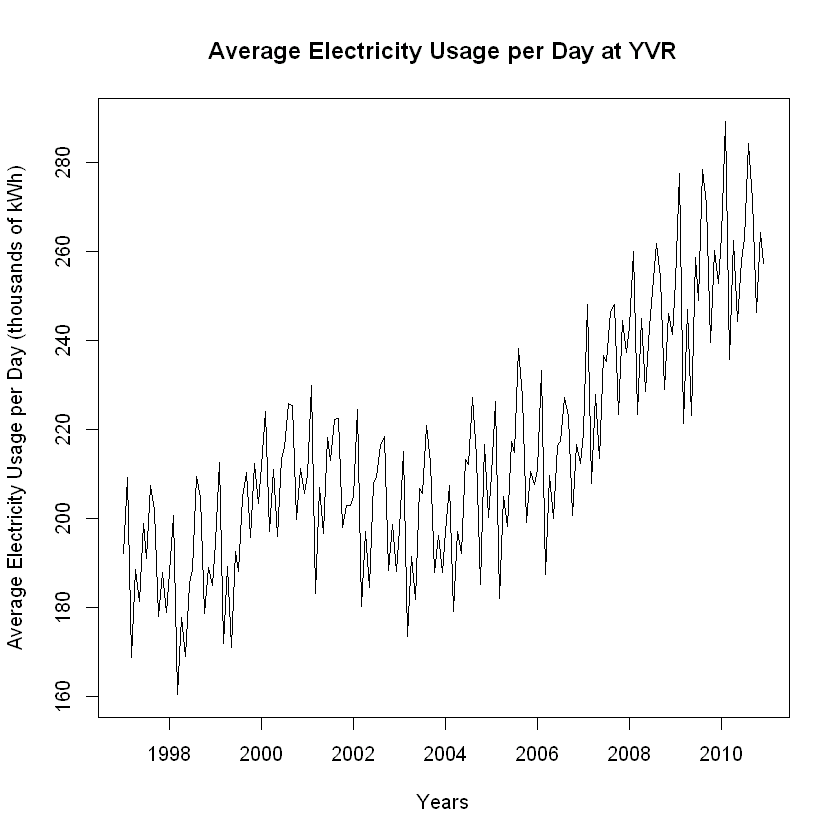

In [8]:
# Q4
#Calendar Adjustment by Days in Month

plot(energy_ts/monthdays(energy_ts), 
     ylab="Average Electricity Usage per Day (thousands of kWh)",
     xlab="Years",
     main="Average Electricity Usage per Day at YVR")

Is there a different calendar-related adjustment that you think would be more effective? Describe it and why you think it could be more effective (5 sentences max). Note: you do not have to write code or perform this adjustment. (0.5 marks)

A better adjustment for YVR energy use could be to take into account the number of weekdays and weekends in each month. Since energy use at the airport may differ between weekdays and weekends due to flight schedules and passenger traffic, this would help highlight true seasonal trends. Adjusting for holidays could further improve accuracy. This approach would give a clearer picture of YVR’s energy consumption patterns.

### Divide the data into the training set and the test set (0.25 marks)
Write the code to create the training set and the test set. Show the code as your answer on Canvas.

In [13]:
# Q6
train <- window(energy_ts/monthdays(energy_ts), start = c(1997, 1), end = c(2007, 12))

test <- window(energy_ts/monthdays(energy_ts), start = c(2008, 1), end = c(2010, 12))


In [15]:
train

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1997,192.1935,209.2500,168.7097,188.4667,181.2258,198.7667,190.9677,207.4194,201.7667,177.8710,187.7667,178.8710
1998,187.9032,200.6071,160.3226,177.7000,168.8065,185.2333,188.4194,209.3226,204.6000,178.6774,188.9000,184.8387
1999,194.5161,212.6429,171.8065,189.0667,171.0000,192.5667,188.0968,204.6774,210.3000,195.7419,212.4000,203.2903
2000,211.9355,224.0345,196.9677,211.0000,195.8065,213.3667,216.0323,225.9032,225.3333,199.7419,211.1333,205.5161
2001,209.7097,229.8214,183.0323,206.8667,196.5806,218.1333,212.9677,222.1290,222.5667,197.8387,202.9333,202.9355
2002,204.8065,224.5000,180.2581,197.1333,184.3871,207.8333,209.1290,216.3871,218.4333,188.2903,198.7000,188.0000
2003,197.6129,215.0000,173.3871,191.3667,181.7742,206.6333,205.6774,220.7742,212.6333,187.8065,196.1333,187.7419
2004,196.9355,207.3793,179.0968,196.9333,192.1290,213.3000,212.0000,227.1935,213.9333,185.1935,216.5667,200.2258
2005,209.8065,226.3214,182.0645,204.9333,198.0968,217.3667,214.8710,238.2903,227.1667,199.1290,210.6333,207.5484
2006,211.0968,233.3571,187.3871,209.6667,200.0645,216.4000,217.1935,227.0968,223.0000,200.6452,216.5667,212.3226


In [17]:
test

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2008,243.2258,260.1034,223.3226,245.0333,228.5161,242.9333,251.2258,261.9355,254.2667,229.0000,246.1667,241.3226
2009,253.2903,277.6071,221.2581,247.0000,223.1613,258.6333,248.9677,278.3871,270.7000,239.4516,260.3000,252.9355
2010,263.5806,289.3214,235.6774,262.5667,244.3548,258.0000,262.8710,284.2903,271.8000,246.2903,264.4000,257.2581


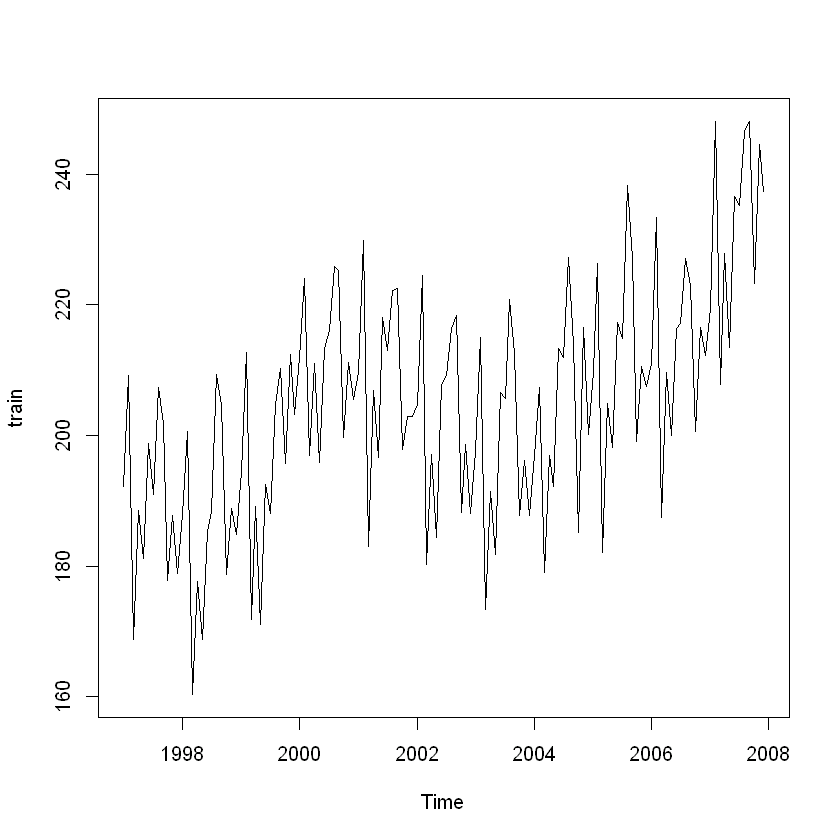

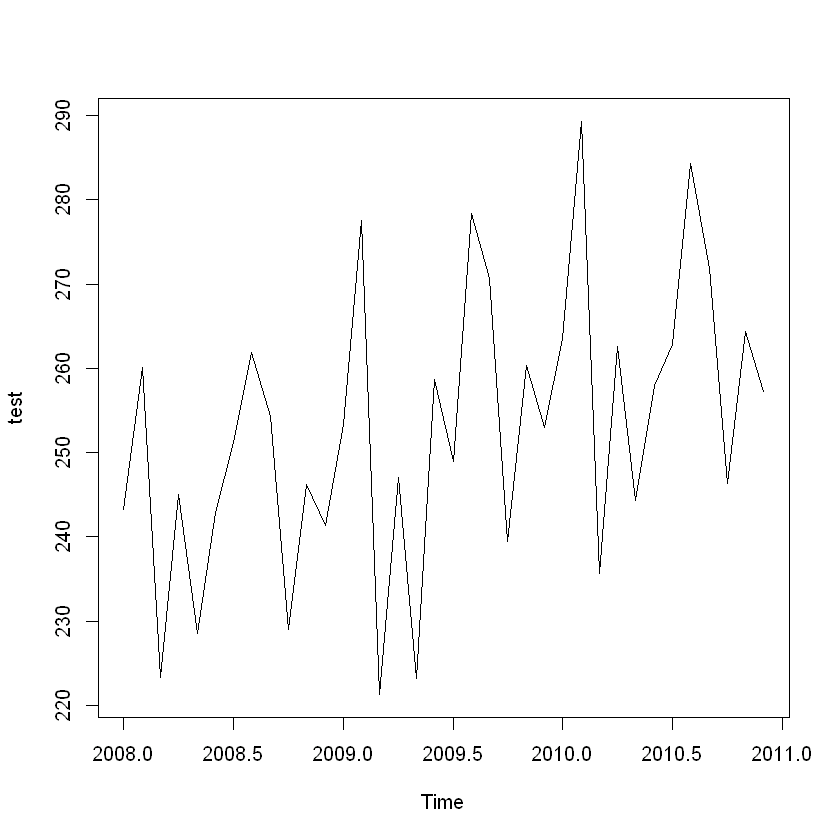

In [19]:
plot(train)
plot(test)

Upload your code to Canvas for Part A (0.25 marks)

----

<div class="alert alert-block alert-info">   

# Part B
### Note that Part B includes everything below this header
<a id="PartB"></a>  

</div>

In [24]:
mydata <- read.csv(file="Energy use at YVR.csv", header=TRUE) 
energy.ts <- ts(mydata$energy, frequency=c(12), start=c(1997)) 

energy.ts.train <- window(energy.ts, end=c(2007,12))

energy.ts.test <- window(energy.ts, start=c(2008,1))



<div class="alert alert-block alert-danger">
    
### Make sure that your code is organized and includes useful annotations and written descriptions of what you are seeing on plots or the conclusions that you are drawing. (0.5 marks)
  
### Prepare all plots for publication by including detailed axis labels.
    
### Complete anwers will include observations and conclusions/interpretations.
<div>

----

<div class="alert alert-block alert-warning">
<a id="EDA1"></a>

# Exploratory Data Analysis (300 words max.) (4 marks)  

Create plots of the electricity use data (**use all the data, not just the training set**); prepare them as if for publication and upload them. Include a decomposition plot from STL decomposition.  

Describe the characteristics of trend, cycle and seasonality in detail, referring to specific characteristics of the plots. Also mention any unusual features, if present. Be specific.  

<br>

Organize your answers as follows:  

Seasonality: 

Both the STL Decomposition and the Seasonal Patterns graphs show a consistent seasonal pattern, with energy use peaking in the summer months (July–August) and dipping in the late winter to early spring (February- March). The seasonal fluctuations suggest higher demand for cooling systems during summer and lower demand in winter/spring. Finally, the ACF plot confirms an annual seasonality with a noticeable peak around Lag 12, which aligns with a yearly cycle.
    
Trend/cycle: 

The STL Decomposition shows a clear upward trend in energy use at YVR, confirmed by the Seasonal Plot, with electricity consumption rising over the years. Recent years (2008–2010) have consistently higher values than earlier ones (1997–2002). 

Within this trend, cyclical patterns are noticeable. From 1996 to 1999, energy use increased before a slight dip, and between 1999 and 2003, it stabilized with a plateau around 2002–2003. After 2004, energy consumption continued rising but with periodic drops, followed by a steeper increase after 2007. Overall, we can conclude that the long-term upward trend reflects continued growth in YVR’s operations.

Unusual features:  

The residual component from the STL decomposition shows minimal fluctuations, but some periods, especially around 1998–2000, show more pronounced fluctuations in residuals, suggesting temporary anomalies in energy consumption during these years.

</div>

Warning message:
"package 'ggplot2' was built under R version 4.4.2"


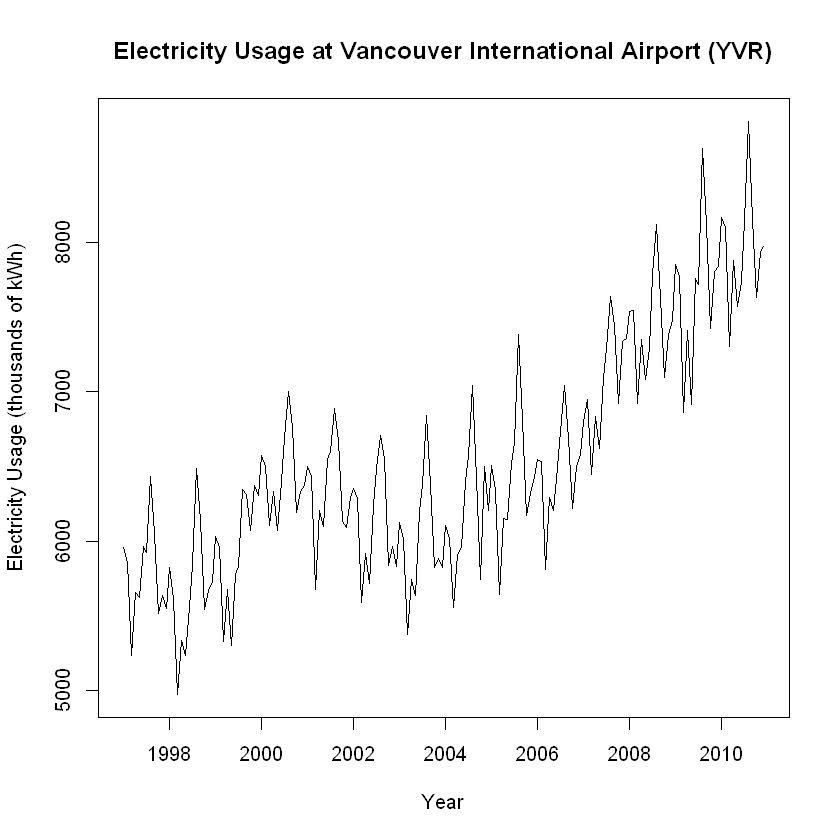

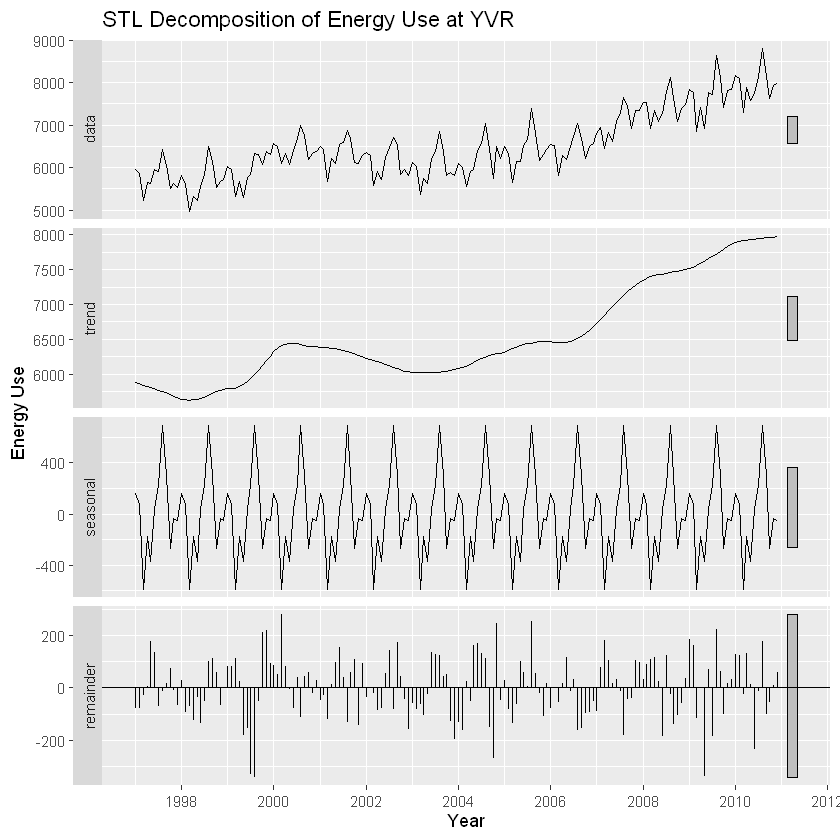

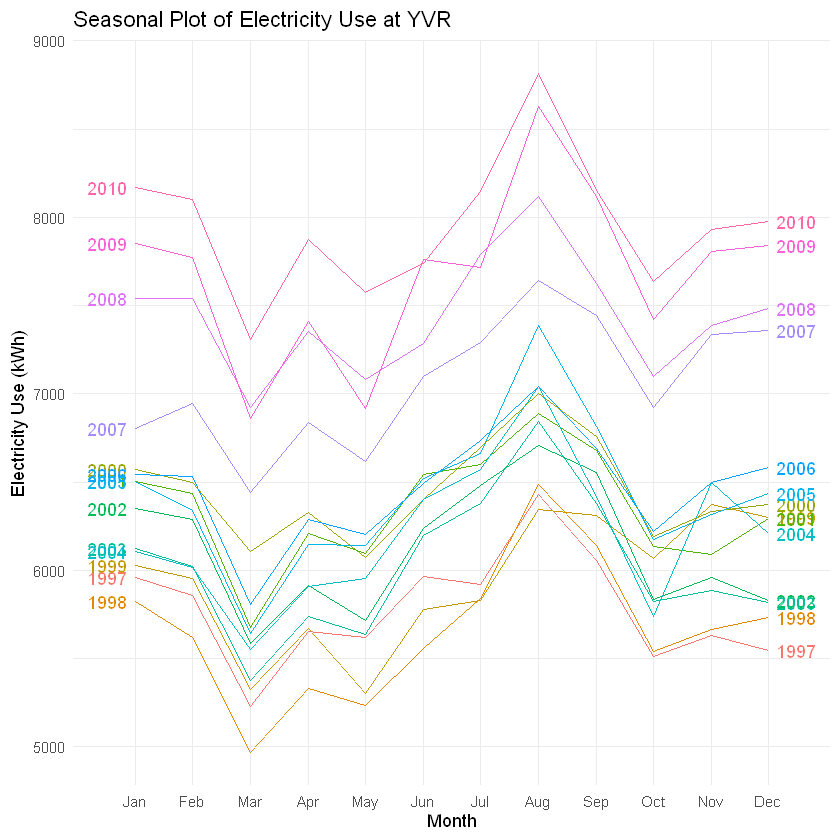

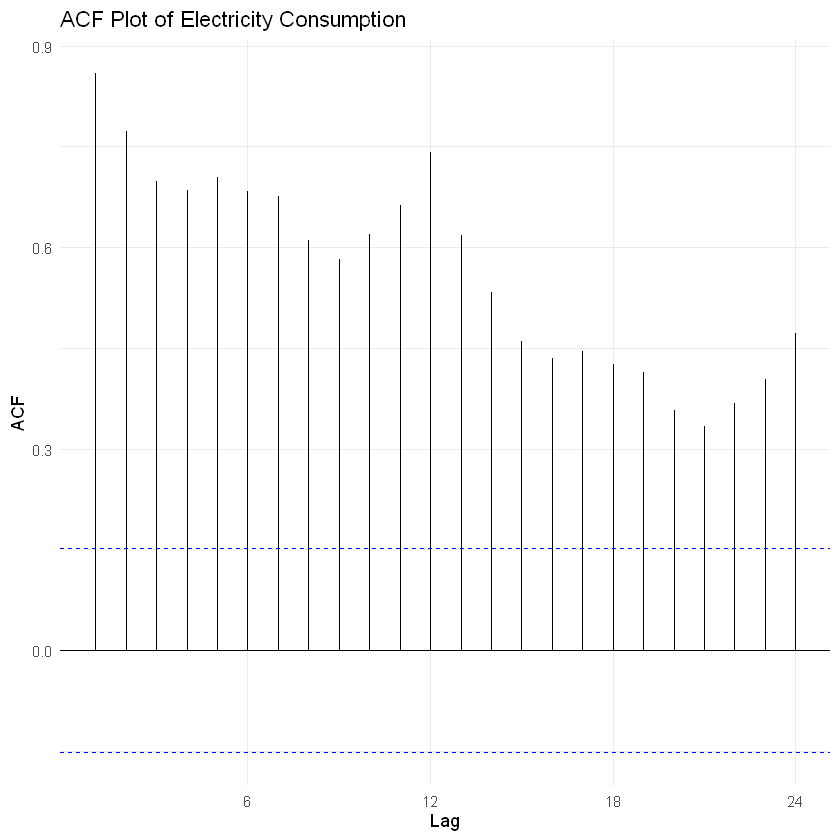

In [26]:
# Load necessary libraries
library(ggplot2)
library(forecast)

# Load the dataset 
mydata <- read.csv(file="Energy use at YVR.csv", header=TRUE)

# Convert the "energy" column into a time series object
energy.ts <- ts(mydata$energy, frequency=12, start=c(1997))

# Create a time plot
plot(energy_ts,
     xlab = "Year",
     ylab = "Electricity Usage (thousands of kWh)",
     main = "Electricity Usage at Vancouver International Airport (YVR)",
) 

# Apply STL decomposition
energy.stl <- stl(energy.ts, s.window="periodic")

# Plot the decomposition
autoplot(energy.stl) + 
  ggtitle("STL Decomposition of Energy Use at YVR") +
  xlab("Year") + 
  ylab("Energy Use")

# Create a seasonal plot to visualize patterns over months
ggseasonplot(energy.ts, year.labels = TRUE, year.labels.left = TRUE) +
  ggtitle("Seasonal Plot of Electricity Use at YVR") +
  ylab("Electricity Use (kWh)") +
  xlab("Month") +
  theme_minimal()

# Electricity Usage Autocorrelation Analysis
ggAcf(energy.ts) +
  ggtitle("ACF Plot of Electricity Consumption") +
  theme_minimal()

<div class="alert alert-block alert-warning">
<a id="Causes"></a>

# Potential causes (300 words max.) (3 marks)
Describe what could be causing the patterns that you are seeing in electricity use. Create any relevant plots and include them. Make sure to discuss any specific features of plots. Remember that the original dataset includes other variables! (300 words max.)

Seasonality: The pattern of energy use at YVR follows a seasonal cycle, it can be explained by temperature and passenger traffic. Indeed, energy consumption is highest in July and August, which aligns with warmer temperatures and increased passenger numbers during the summer months, making this peak expected. On the other hand, energy usage drops from February to March, reaching its lowest point before rising again in April. This decline is likely due to fewer passengers in February and the coldest temperatures occurring between January and March, which may reduce overall airport activity and energy demand.

Trend: From 1996 to 2011, the total number of passengers explains the cyclical nature of energy use, as seen in the STL decomposition. Both passenger numbers and energy consumption show a general increase over time, and energy use rises and falls in response to passenger traffic. For example, during 2002–2003, passenger growth slowed, leading to a temporary plateau in energy consumption. After 2004, both energy use and passenger numbers grew more steadily. 

Unusual Features: The significant expansion of the airport area around 1999 and again around 2007 may explain the sharper fluctuations in energy use. The decline of energy between 1998 and 2000 could be linked to construction activity, while the steeper increase after 2007 was likely due to the completed expansion and increased operations.

</div>

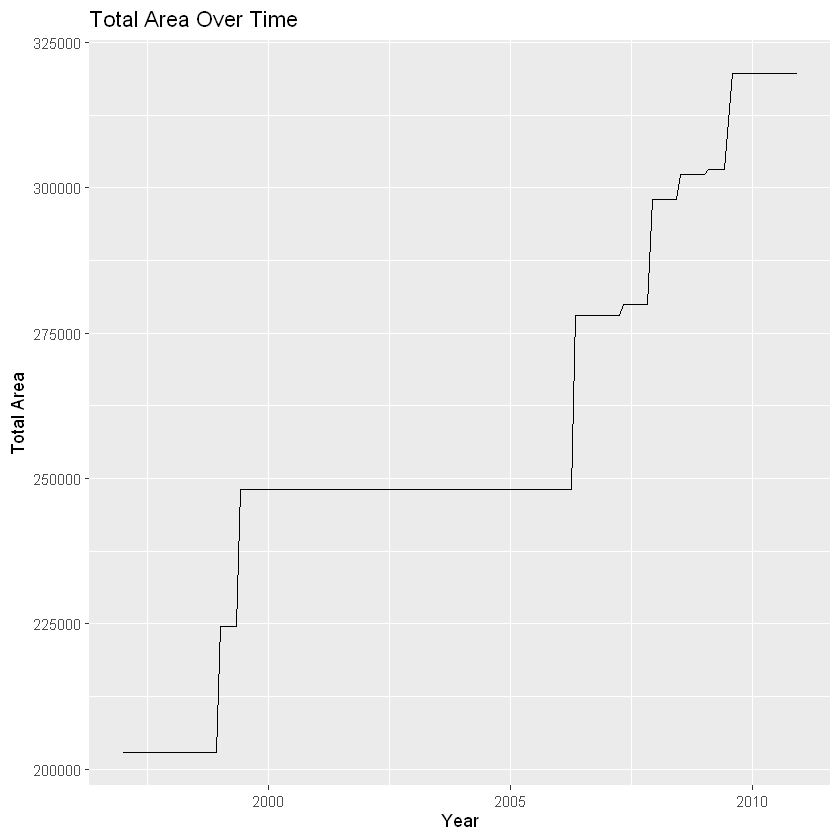

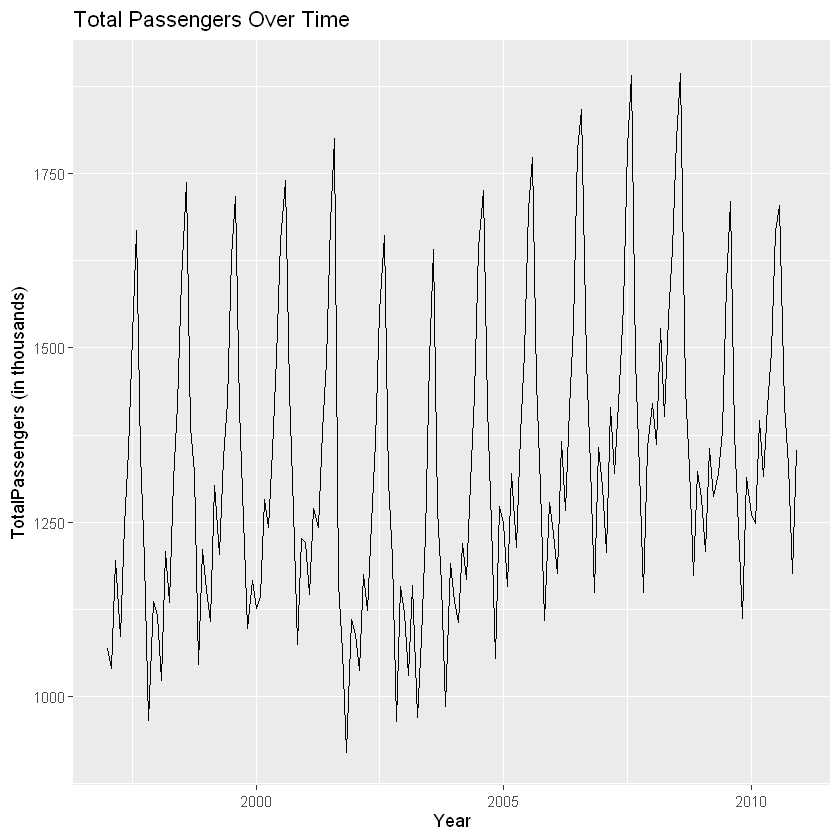

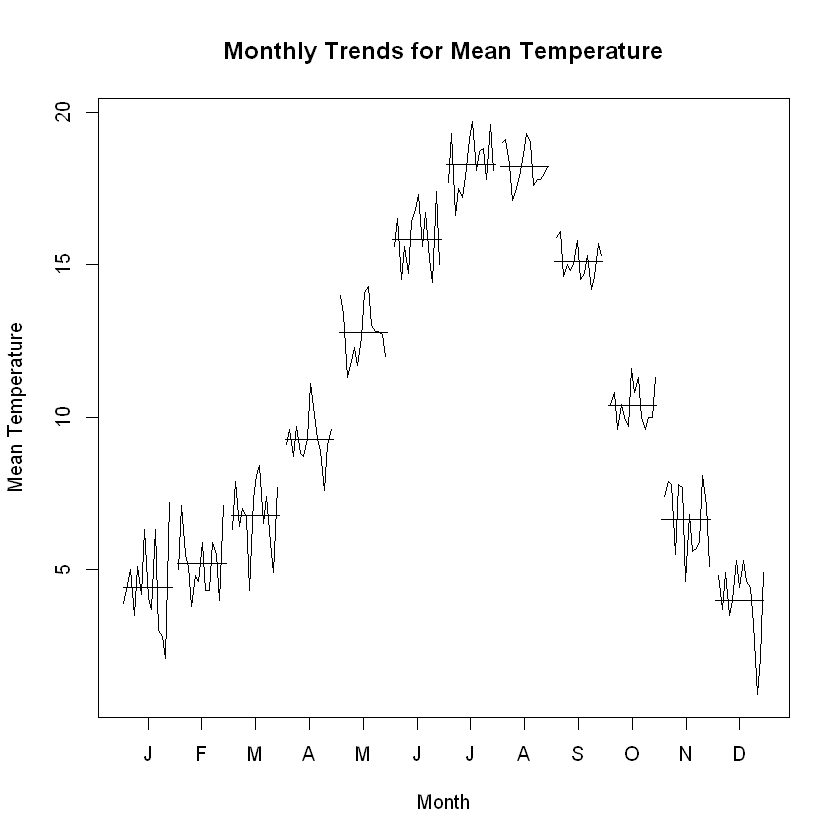

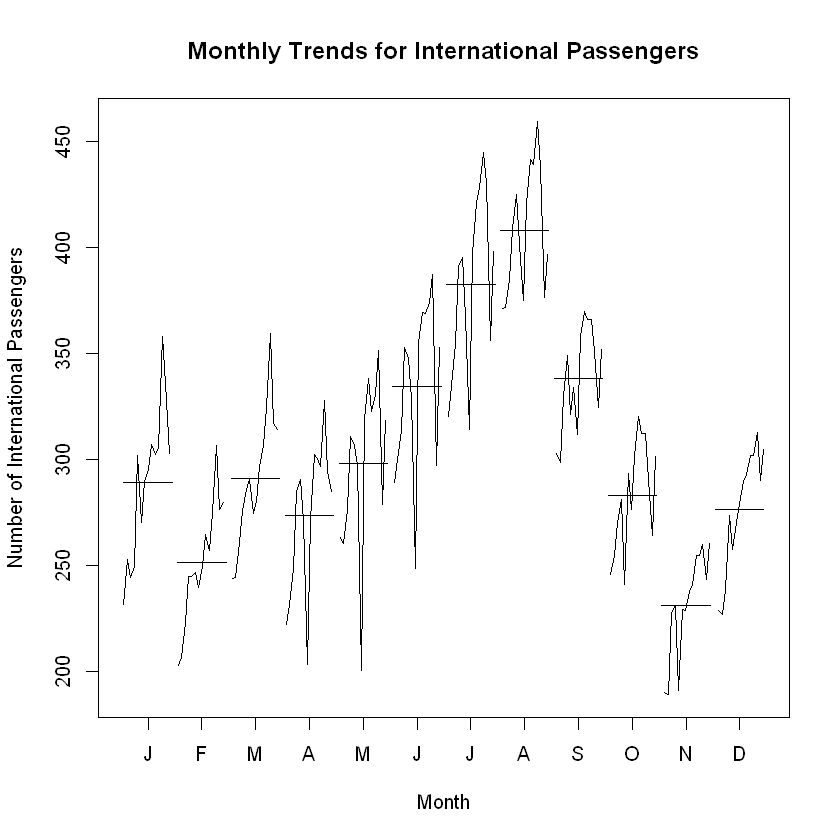

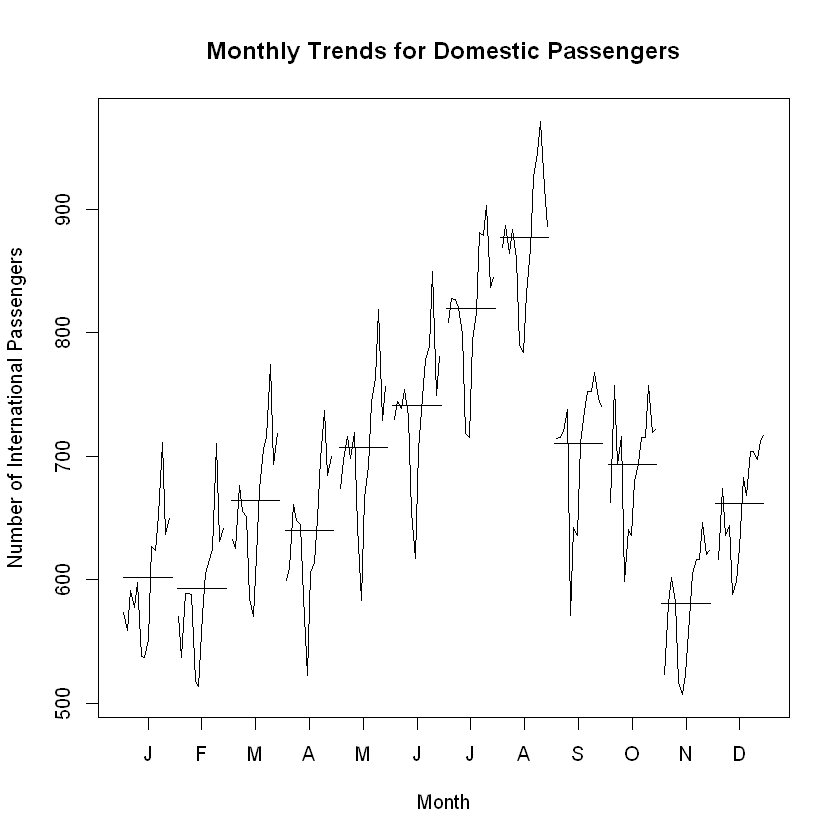

In [28]:
mean.temp.ts <- ts(mydata$mean.temp, 
                   start = c(1997, 1), frequency = 12)

total.passengers.ts <- ts(mydata$total.passengers, 
                                  start = c(1997, 1), 
                                  frequency = 12)

international.passengers.ts <- ts(mydata$international.passengers, 
                                  start = c(1997, 1), 
                                  frequency = 12)

domestic.passengers.ts <- ts(mydata$domestic.passengers, 
                                  start = c(1997, 1), 
                                  frequency = 12)

area.ts <- ts(mydata$total.area, 
                             start = c(1997, 1), 
                             frequency = 12)


# Plot Airport Total Area Over Time
autoplot(area.ts) +
  ggtitle("Total Area Over Time") +
  xlab("Year") +
  ylab("Total Area")

# Plot Number of Total Passengers Over Time
autoplot(total.passengers.ts) +
  ggtitle("Total Passengers Over Time") +
  xlab("Year") +
  ylab("TotalPassengers (in thousands)")

#Plot Monthly Trends for Mean Temperature 
monthplot(mean.temp.ts, main="Monthly Trends for Mean Temperature", ylab="Mean Temperature", xlab="Month")

#Plot Monthly Trends for International Passengers
monthplot(international.passengers.ts,main="Monthly Trends for International Passengers", ylab="Number of International Passengers", xlab="Month")    

#Plot Monthly Trends for Domestic Passengers
monthplot(domestic.passengers.ts,main="Monthly Trends for Domestic Passengers", ylab="Number of International Passengers", xlab="Month")    
 

<div class="alert alert-block alert-success">
<a id="Basic"></a>

# Basic forecasting methods
</div>  

Use the basic methods we have learned to develop forecasts for the test set. Plot in the following colours:  

mean method (blue)  
drift method (green)  
naïve method (red)  
seasonal naïve method (purple)  

 
## Visual comparison and assessment of basic methods (1.25 marks)

Plot the training set and test set data in black. Include the forecasts of the test set for each of the basic forecasting methods in a different colour (colours are given above) with a legend to explain.  

Prepare the plot for publication and upload it.

 

From a visual assessment, which of the basic forecasting methods seems to produce the best forecasts of the test set? Discuss briefly. (4 sentences max.)  
    

In [32]:
library(forecast)

energy_ts_train <- window(energy_ts, end=c(2007,12))
energy_ts_test <- window(energy_ts, start=c(2008,1))

In [33]:
energyfit1 <- meanf(energy_ts_train, h=36)

In [35]:
energyfit2 <- rwf(energy_ts_train, h=36, drift=TRUE)

In [37]:
energyfit3 <- naive(energy_ts_train, h=36)

In [39]:
energyfit4 <- snaive(energy_ts_train, h=36)

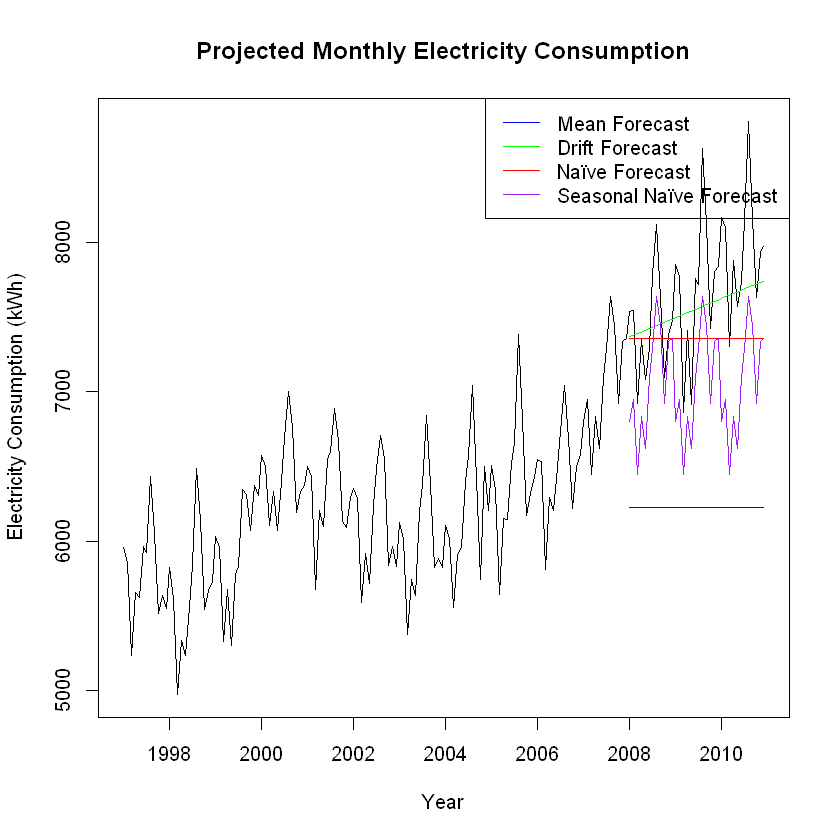

In [41]:
# Visualizing Forecasted Electricity Usage Over Time
plot(energy_ts, 
     main = "Projected Monthly Electricity Consumption", 
     ylab = "Electricity Consumption (kWh)", 
     xlab = "Year")

# Adding Forecasted Trends from Different Models
lines(energyfit1$mean, col = "blue")   # Mean-based forecast
lines(energyfit2$mean, col = "green")  # Drift method forecast
lines(energyfit3$mean, col = "red")    # Naïve approach forecast
lines(energyfit4$mean, col = "purple") # Seasonal naïve forecast

# Adding a Legend for Clarity
legend("topright", 
       lty = 1, 
       col = c("blue", "green", "red", "purple"), 
       legend = c("Mean Forecast", "Drift Forecast", "Naïve Forecast", "Seasonal Naïve Forecast"))


From a visual assessment, the Drift Forecast (green line) appears to produce the best forecasts for the test set. It follows the upward trend of electricity consumption more accurately than the Mean Forecast, which remains flat, and the Naïve Forecast, which does not account for long-term growth. The Seasonal Naïve Forecast captures some seasonal variations but deviates a lot from actual values. Overall, the Drift Forecast seems to align more closely with the observed data, making it the most reasonable choice.

## Accuracy measures (0.5 marks)
Create a table with the RMSE, MAE, MAPE, and MASE for the test set for each of the four basic methods. Round values to 1 decimal place.

In [45]:
# Defining Forecasting Methods
forecast_methods <- c("Mean Forecast", "Drift Forecast", "Naïve Forecast", "Seasonal Naïve Forecast")

# Calculating Accuracy Metrics for Each Model
model_accuracy <- rbind(
  round(accuracy(energyfit1, energy_ts_test)[2, c(2,3,5,6)], 1),  # Mean method
  round(accuracy(energyfit2, energy_ts_test)[2, c(2,3,5,6)], 1),  # Drift method
  round(accuracy(energyfit3, energy_ts_test)[2, c(2,3,5,6)], 1),  # Naïve method
  round(accuracy(energyfit4, energy_ts_test)[2, c(2,3,5,6)], 1)   # Seasonal naïve method
)

# Combining Methods and Results
accuracy_summary <- cbind(forecast_methods, model_accuracy)
accuracy_summary


forecast_methods,RMSE,MAE,MAPE,MASE
Mean Forecast,1528.5,1463.8,18.8,5.5
Drift Forecast,416,328.5,4.2,1.2
Naïve Forecast,550.1,443.2,5.6,1.7
Seasonal Naïve Forecast,698.7,626.8,8,2.4


## Comparison of basic methods (1 mark)
Based on the accuracy measures for the test set, which of the basic forecasting methods seems to forecast the test set the best? Interpret the MASE for this method. (4 sentences max.) 

The Drift method provides the most accurate forecast for the test set. MASE (Mean Absolute Scaled Error) compares a model’s absolute error to that of a naïve forecast, with lower values indicating better performance. The Drift method’s MASE of 1.2 suggests it performs slightly better than the naïve method, which has a MASE of 1.7. Although the improvement is small, it still suggests that the Drift method provides a more reliable forecast by following the trend.

----

<div class="alert alert-block alert-success">
<a id="ETS"></a>

# Exponential Smoothing (ETS) model

Fit ETS models to the training set. Find your best model and present it here. Include any other models you tried in **Appendix A**.
    
</div>    

## What is the model, using the ETS(__, __, __) notation? (0.25 marks)

ETS(A,A,A)

## What are the estimates of the smoothing parameters? (0.25 marks)

Here the best model is the Holt-Winters' Additive Method that takes into account level, trend, and seasonality using additive smoothing. 

Here are the smoothing parameters:

- **Alpha (α) = 0.7846** : Controls the weighting of recent observations
- **Beta (β) = 0.0001** : Controls the weighting of trend adjustments
- **Gamma (γ) = 0.0001** : Controls the weighting of seasonal adjustments

In [55]:
etsfit1 <- hw(energy_ts_train, seasonal="additive", h=36) 
summary(etsfit1 )


Forecast method: Holt-Winters' additive method

Model Information:
Holt-Winters' additive method 

Call:
hw(y = energy_ts_train, h = 36, seasonal = "additive")

  Smoothing parameters:
    alpha = 0.7846 
    beta  = 1e-04 
    gamma = 1e-04 

  Initial states:
    l = 5879.3546 
    b = 12.3652 
    s = -36.7977 -27.2016 -238.1219 321.0426 666.3048 232.4424
           58.5104 -349.8579 -192.2142 -564.3842 38.3341 91.9432

  sigma:  134.6878

     AIC     AICc      BIC 
1955.855 1961.224 2004.863 

Error measures:
                    ME     RMSE      MAE         MPE     MAPE      MASE
Training set -1.171192 126.2613 98.95847 -0.06213835 1.594299 0.3734517
                    ACF1
Training set 0.005411505

Forecasts:
         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2008       7485.996 7313.387 7658.605 7222.013 7749.979
Feb 2008       7444.636 7225.222 7664.050 7109.071 7780.200
Mar 2008       6854.252 6596.383 7112.120 6459.876 7248.627
Apr 2008       7238.806 6947.507 

## Explain why this model is appropriate based on the features of the data. (4 sentences max.) (1.5 marks)

The alpha value (0.7846) gives more weight to recent data, which makes sense based on the seasonal patterns seen in the STL decomposition plot. The beta value (0.0001) shows that the trend is mostly steady, with very little adjustment over time, matching the trend component in the STL plot. Similarly, the gamma value (0.0001) shows that seasonality stays consistent, with almost no change, which aligns with the seasonality component in the STL plot. Since there is no damping, the model assumes the trend will continue without fading, just like the STL trend plot shows.

## Model plot (0.75 marks)

Create a time plot of the data in black with a gap between the training set and test set data.

Show the fitted values of the model graphed in blue. Show the forecasts for the test set with a bold blue line and the 80% and 95% prediction intervals as shaded regions.

Prepare this plot for publication and upload it.

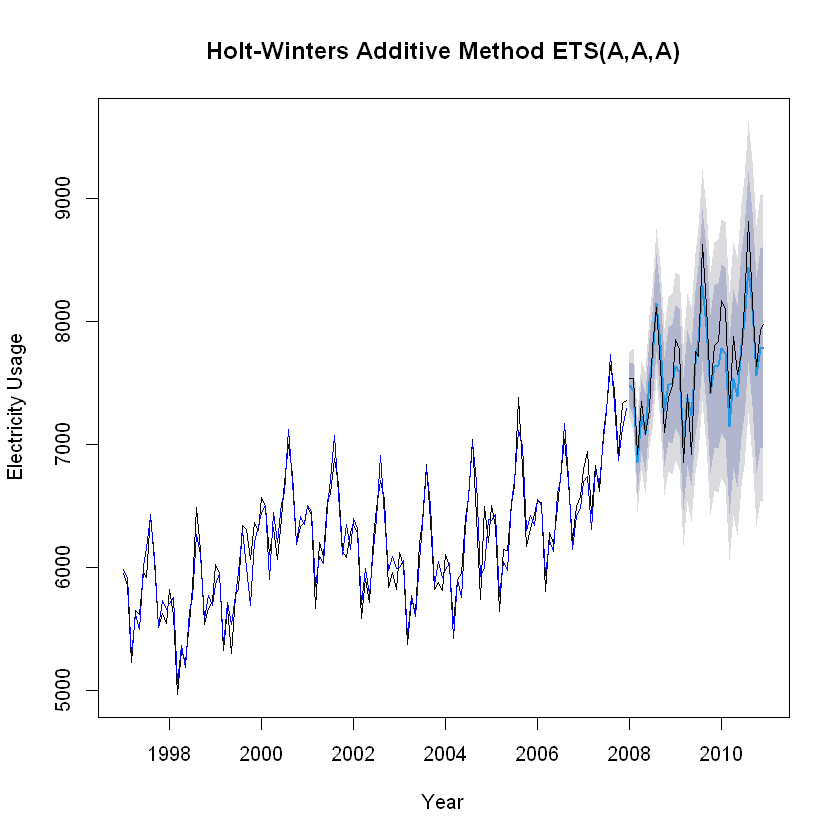

In [60]:
# Plot the actual energy usage with a gap for test data
plot(etsfit1, 
     main="Holt-Winters Additive Method ETS(A,A,A)", 
     ylab="Electricity Usage", 
     xlab="Year")

# Add the fitted values in blue
lines(fitted(etsfit1), col="blue", lwd=1.5)

# Add test set data in black
lines(energy_ts_test, col="black", lwd=1.5)

## Goodness of fit (1 mark)

Quantify and discuss the goodness of fit of the model to the training set. You can compare this model to other ETS models that you tried. (Present any values, then 4 sentences max.)

For the training set, the Additive Holt-Winters method (AAA) seemed to be the best model, as it had the lowest RMSE (126.26) along with low MAPE (1.59), MASE (0.37), and MAE (98.96). These values suggest that it had small errors and fit the training data well. However, ETS(A,N,A) also showed strong performance, with a slightly higher RMSE (126.65), the same MASE (0.37), and slightly lower MAPE (1.57) and MAE (98.1). This made it challenging to determine which model would perform better on unseen data.

Given these results, we needed to evaluate both models on the test set to ensure the best forecasting accuracy. After testing, we confirmed that ETS(A,A,A) was the strongest model, with significantly lower accuracy measures in the forecast (for example: ETS (A,A,A) RMSE 189 < 386.41 ETS(A,N,A)).

## Accuracy measures (0.5 marks)
Calculate the accuracy measures (RMSE, MAE, MAPE, MASE) to show how well the model forecasts for the test set.

In [88]:
# Comparing Different Forecasting Models

# Define the forecasting methods being evaluated
forecast_methods <- c("Holt-Winters Additive (Seasonal)", 
                      "Holt-Winters Multiplicative (Seasonal)", 
                      "Holt-Winters Additive Damped (Trend: Additive)", 
                      "Holt-Winters Multiplicative Damped (Trend: Additive)", 
                      "ETS(A,N,A) - Selected by R")

# Compute accuracy metrics for each forecasting model
forecast_comparison <- cbind(
  forecast_methods, 
  round(
    rbind(
      accuracy(forecast(etsfit1, 36), energy_ts_test)[2, c(2,3,5,6)],  # Additive Holt-Winters
      accuracy(forecast(etsfit2, 36), energy_ts_test)[2, c(2,3,5,6)],  # Multiplicative Holt-Winters
      accuracy(forecast(etsfit3, 36), energy_ts_test)[2, c(2,3,5,6)],  # Additive Holt-Winters Damped
      accuracy(forecast(etsfit4, 36), energy_ts_test)[2, c(2,3,5,6)],  # Multiplicative Holt-Winters Damped
      accuracy(forecast(etsfit5, 36), energy_ts_test)[2, c(2,3,5,6)]   # ETS(A,N,A) - Auto-selected model
    ), 2
  )
)

# Display the results
forecast_comparison


forecast_methods,RMSE,MAE,MAPE,MASE
Holt-Winters Additive (Seasonal),189,155.9,2,0.59
Holt-Winters Multiplicative (Seasonal),243.61,203.89,2.62,0.77
Holt-Winters Additive Damped (Trend: Additive),381.18,312.72,3.97,1.18
Holt-Winters Multiplicative Damped (Trend: Additive),279.92,233.9,3,0.88
"ETS(A,N,A) - Selected by R",386.41,315.94,4.01,1.19


## Accuracy of forecasts (1 mark)
Discuss how well this model forecasts the test set based on any plots or values that you calculated in previous questions. Remember that you can compare it to the basic methods. (4 sentences max.)

1. Overall, ETS models outperform basic methods, with all MASE values lower than the Naïve Method (1.7).  
2. The Additive Holt-Winters method provides the best forecast for the test set across all accuracy metrics (RMSE, MAE, MAPE, MASE) compared to the Mean, Drift, Naive and Seasonal Naive forecasts.
3. This result aligns with the STL decomposition, which suggests an additive seasonal pattern in the data.  
4. The consistency across multiple accuracy measures reinforces the reliability of the additive approach.  

## Residual diagnostics (3.5 marks)

a) Calculate the mean of the residuals. Does this value indicate bias? (0.5 marks)  
b) Use the checkresiduals() function. Which properties of residuals have been met or not met according to these plots? (2 marks)  
c) Interpret the results of a portmanteau test for autocorrelations. Clearly state the hypotheses, the number of lags tested, the test statistic, p-value, decision, and concluding sentence. (1 mark)  

In [93]:
#a)
mean(residuals(etsfit1))

[1] -1.171192

The mean residual of -1.17 is close enough to zero, so it indicates that there is no significant bias in the model. This means it does not largely overpredict or underpredict the values.


	Ljung-Box test

data:  Residuals from Holt-Winters' additive method
Q* = 14.031, df = 24, p-value = 0.9459

Model df: 0.   Total lags used: 24



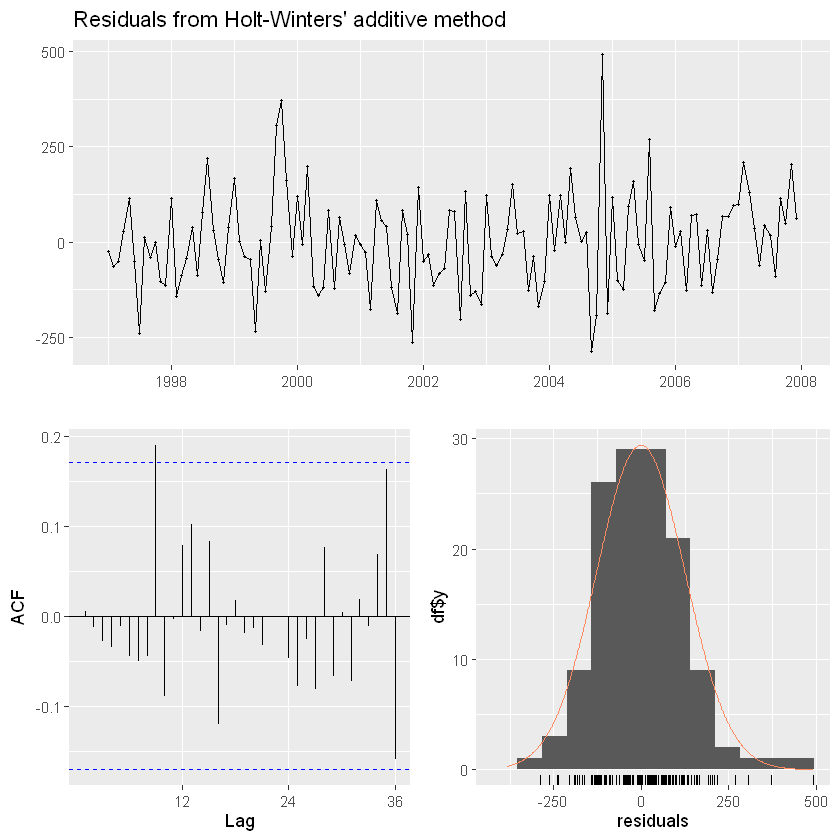

In [96]:
#b)
checkresiduals(etsfit1)

* Mean close to zero (Yes Met): The mean residual is -1.17, showing no bias.
* No autocorrelation (Yes Met): The ACF plot shows no strong patterns.
* Normal distribution (Yes Mostly Met): The histogram is close to normal, but the tails have some deviations.
* Constant variance (Not met): Residuals vary more around 2004, suggesting changing variance.

#c)

Hypotheses:

Null Hypothesis (H₀): The residuals are not autocorrelated.
Alternative Hypothesis (H₁): The residuals are autocorrelated.

Test Details:
Number of lags tested: 24
Test Statistic (Q) = 14.031
p-value = 0.9459

Decision:
Since p-value (0.9459) > 0.05, we fail to reject the null hypothesis.

Conclusion:
There is no significant autocorrelation in the residuals, meaning the model captures the patterns well, and the residuals behave like white noise. 

----

<div class="alert alert-block alert-success">
<a id="ARIMA"></a>
    
# ARIMA model
    
Fit ARIMA models to the training set. Find your best model and present it here. Include any other models you tried in **Appendix B**.
    
</div>    

## What is the model, using the ARIMA(p, d, q)X(P, D, Q)m notation? (0.25 marks)

The selected model, **ARIMA(1,1,0)(0,1,1)[12]**, will be referred to as **Model 3** among the ARIMA models tested.

In [103]:
library(forecast)

energy_ts_train <- window(energy_ts, end=c(2007,12))
energy_ts_test <- window(energy_ts, start=c(2008,1))

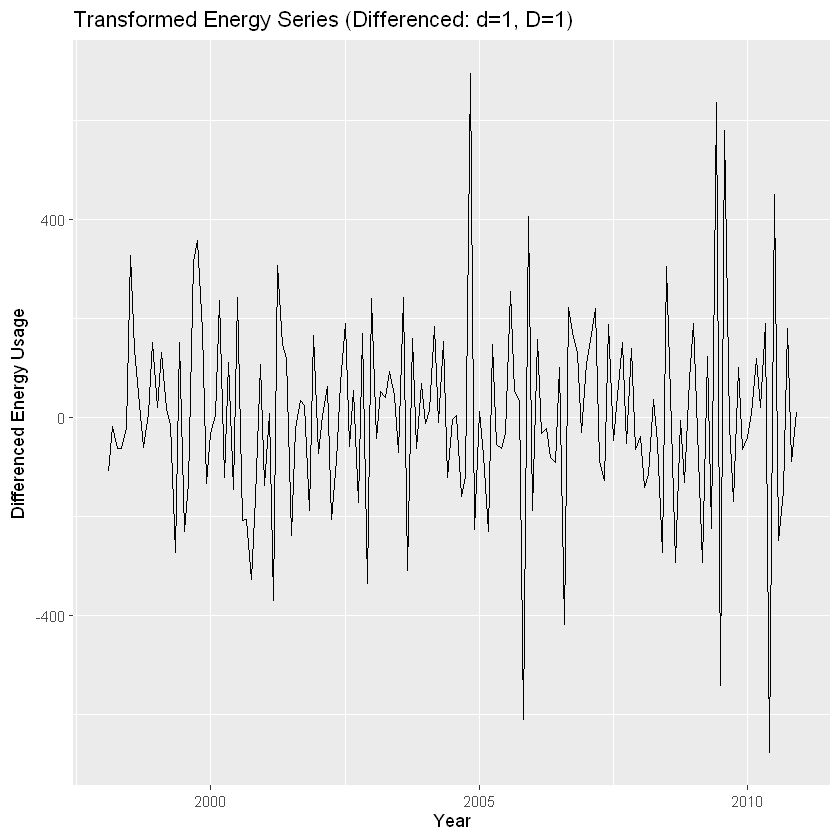

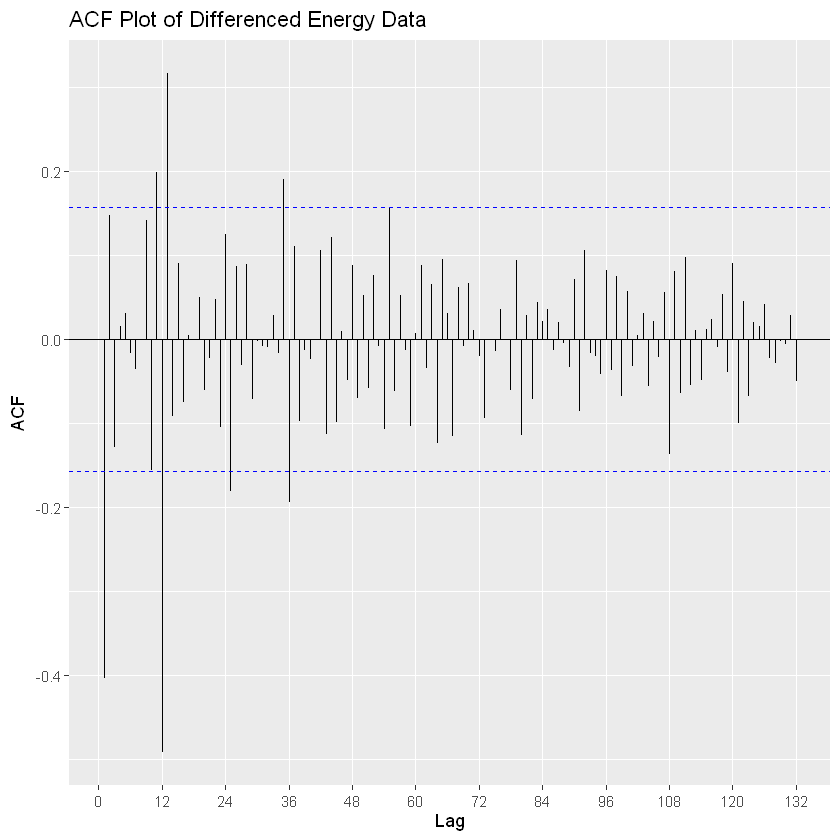

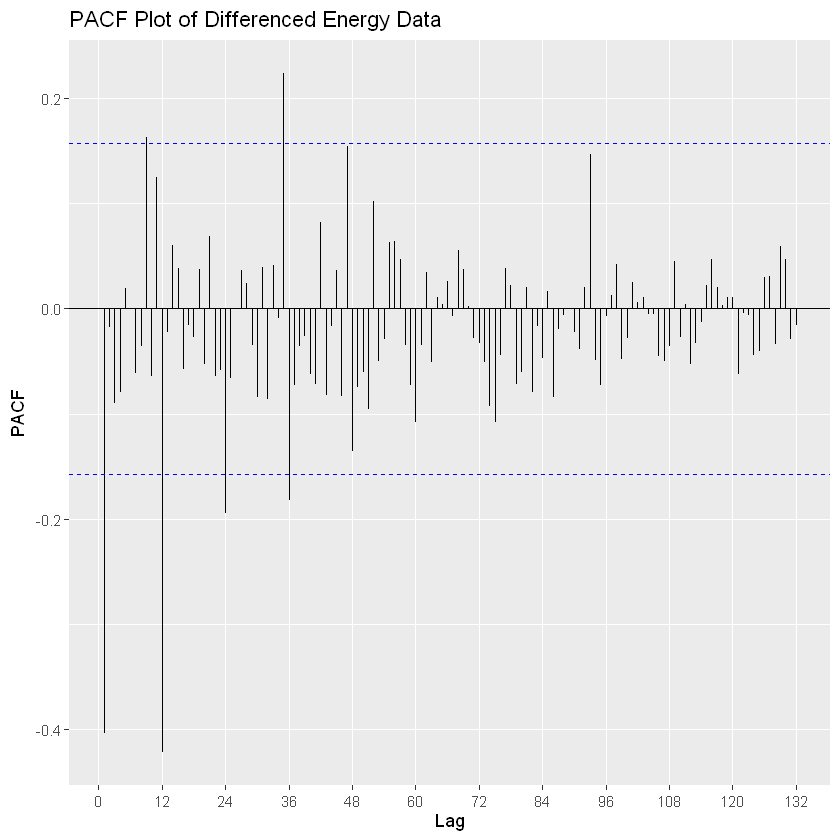

In [105]:
# Applying Seasonal and Non-Seasonal Differencing  
# - Seasonal differencing at D=1 (lag=12)  
# - Non-seasonal differencing at d=1  

library(ggplot2)

# Perform differencing to remove trend and seasonality
energy_ts_diff <- diff(diff(energy_ts, lag=12))  

# Visualizing the Differenced Time Series  
autoplot(energy_ts_diff) +  
  ggtitle("Transformed Energy Series (Differenced: d=1, D=1)") +  
  xlab("Year") +  
  ylab("Differenced Energy Usage")

# Autocorrelation Function (ACF) Plot  
ggAcf(energy_ts_diff, lag.max=132) +  
  ggtitle("ACF Plot of Differenced Energy Data")

# Partial Autocorrelation Function (PACF) Plot  
ggPacf(energy_ts_diff, lag.max=132) +  
  ggtitle("PACF Plot of Differenced Energy Data")


Warning message in Arima(energy_ts_train, order = c(1, 1, 0), seasonal = list(order = c(0, :
"No drift term fitted as the order of difference is 2 or more."


Series: energy_ts_train 
ARIMA(1,1,0)(0,1,1)[12] 

Coefficients:
          ar1     sma1
      -0.1972  -0.8927
s.e.   0.0905   0.1794

sigma^2 = 18824:  log likelihood = -762.54
AIC=1531.08   AICc=1531.29   BIC=1539.42

Training set error measures:
                   ME    RMSE      MAE       MPE     MAPE      MASE        ACF1
Training set 9.495075 129.171 93.95688 0.1257726 1.494625 0.3545766 -0.01035696

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,9.495075,129.1710,93.95688,0.1257726,1.494625,0.3545766,-0.01035696,NA
Test set,-9.243577,159.9366,125.09305,-0.2000004,1.633898,0.4720790,0.22421431,0.3373746


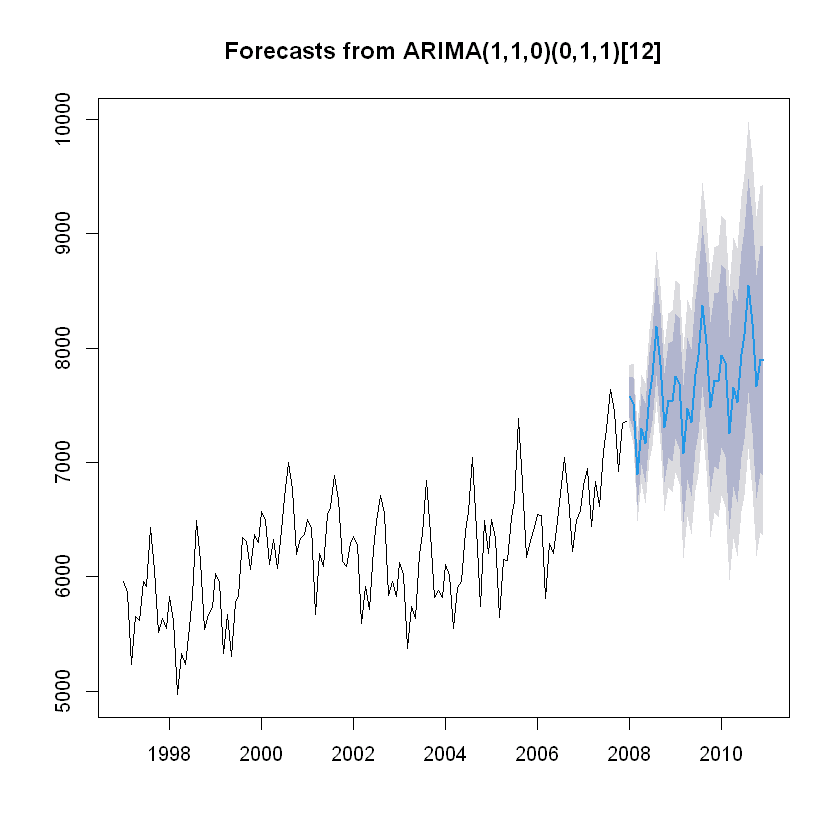

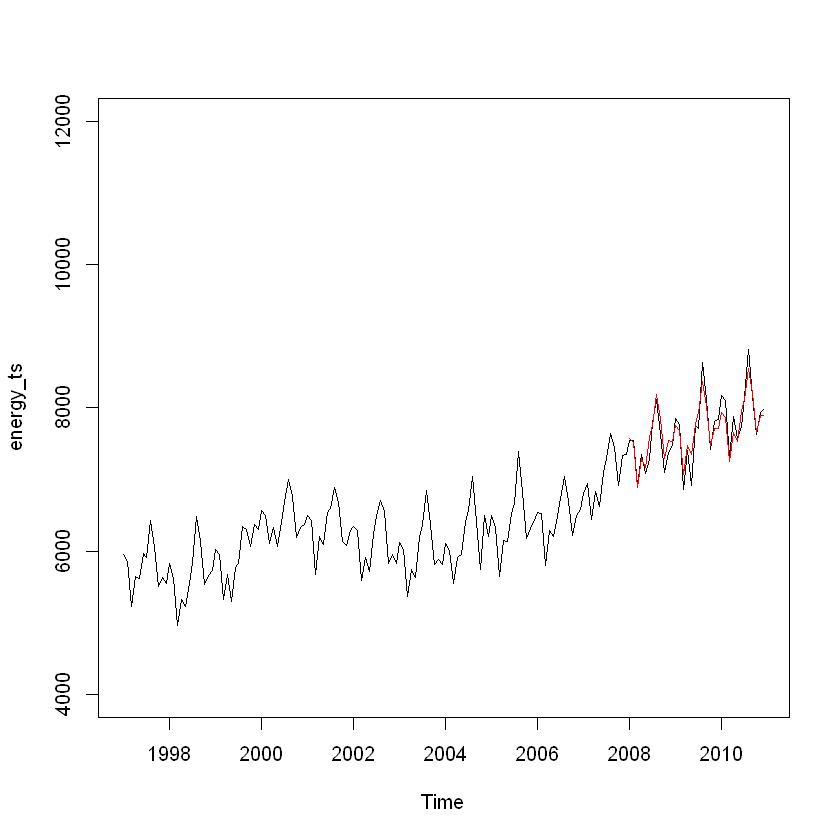


	Ljung-Box test

data:  Residuals from ARIMA(1,1,0)(0,1,1)[12]
Q* = 17.722, df = 22, p-value = 0.7223

Model df: 2.   Total lags used: 24



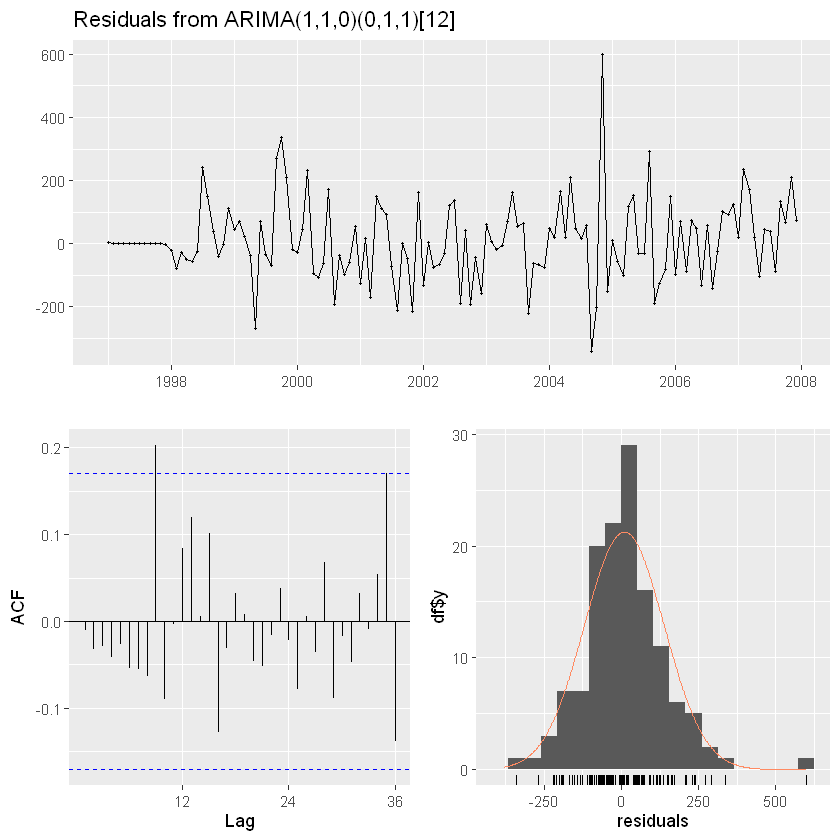

In [109]:
# Model 3: ARIMA(1,1,0)(0,1,1)[12] with Drift

# Fit the ARIMA model with specified orders and seasonal components
fit_arima3 <- Arima(
  energy_ts_train,
  order = c(1, 1, 0),                # Non-seasonal ARIMA(p,d,q) components
  seasonal = list(order = c(0, 1, 1), # Seasonal ARIMA(P,D,Q) components
                  period = 12),       # Seasonal period of 12 (monthly data)
  include.drift = TRUE               # Include drift to account for trend
)

# Model Summary
summary(fit_arima3)

# Generate Forecasts for the Next 36 Periods
plot(forecast(fit_arima3, h = 36))

# Evaluate Forecast Accuracy Against the Test Set
accuracy(forecast(fit_arima3, h=36), energy_ts_test)

# Visualizing Forecast vs. Actual Data
plot(energy_ts, ylim = c(4000, 12000)) # Set y-axis limits for better visualization
lines(forecast(fit_arima3, h=36)$mean, col = "red") # Add forecasted values in red

# Residual Diagnostics
checkresiduals(fit_arima3)


## What are the estimates of the parameters? (0.25 marks)

The estimated parameters for the ARIMA(1,1,0)(0,1,1)[12] model are:

* The autoregressive coefficient is −0.1972 with a standard error of 0.0905, suggesting a moderate negative correlation with the previous observation.
* The seasonal moving average coefficient is −0.8927 with a standard error of 0.1794, reflecting a strong seasonal adjustment.
* The error variance is 18,824, representing the residual variance in the model.odel.

In [111]:
summary(fit_arima3)

Series: energy_ts_train 
ARIMA(1,1,0)(0,1,1)[12] 

Coefficients:
          ar1     sma1
      -0.1972  -0.8927
s.e.   0.0905   0.1794

sigma^2 = 18824:  log likelihood = -762.54
AIC=1531.08   AICc=1531.29   BIC=1539.42

Training set error measures:
                   ME    RMSE      MAE       MPE     MAPE      MASE        ACF1
Training set 9.495075 129.171 93.95688 0.1257726 1.494625 0.3545766 -0.01035696

## Appropriateness of model (2 marks)
Explain why this model is appropriate based on the features of the data. Include the ACF and PACF plots of the differenced data. (5 sentences max.)

We first applied seasonal (D=1, lag=12) and non-seasonal (d=1) differencing and examined the ACF and PACF plots of the transformed data. To determine (P,D,Q)12, we analyzed lags 12, 36, 48...132, noting that the ACF showed only two significant lags (12 and 36), while the PACF had three (12, 24, and 36). Since the ACF lag at 36 may be due to chance, we concluded that Q=1 and P=0. For the non-seasonal (p,d,q) selection, both ACF and PACF showed significance at lags 1 and another lag (ACF: 11, PACF: 10), with the second likely due to chance, suggesting either (1,1,0) or (0,1,1). Based on this analysis, we determined that the best model is ARIMA(1,1,0)(0,1,1)[12].

## Model plot (0.75 marks)

Create a time plot of the data in black with a gap between the training set and test set data.

Show the fitted values of the model graphed in blue. Show the forecasts for the test set with a bold blue line and the 80% and 95% prediction intervals as shaded regions.

Prepare this plot for publication and upload it.

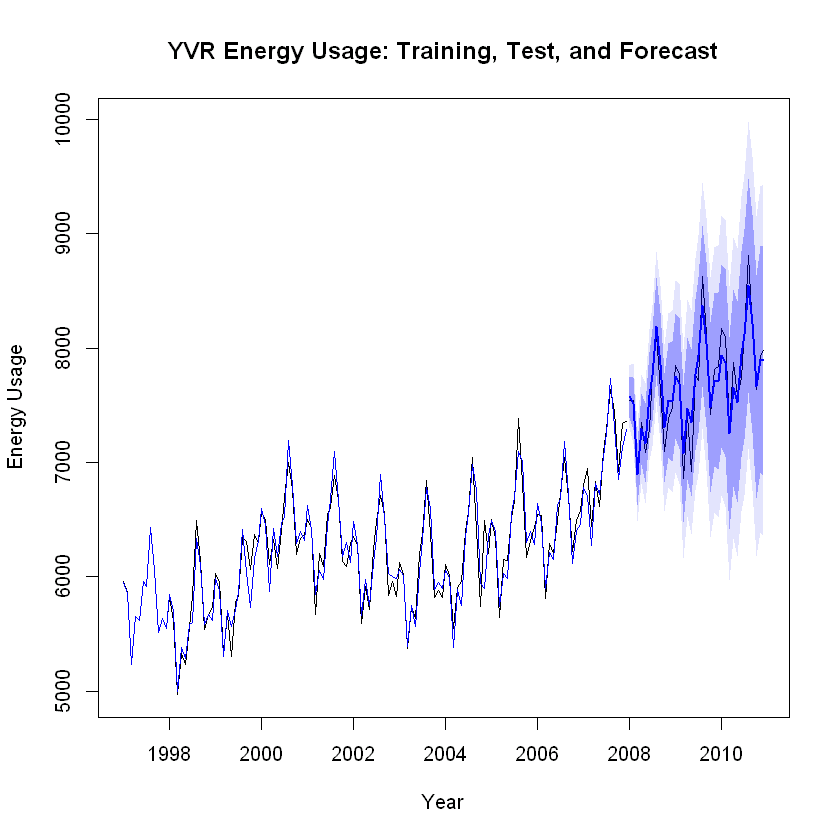

In [116]:
library(ggplot2)

# Step 1: Generate Forecast for the Next 36 Months
arima3_forecast <- forecast(fit_arima3, h = 36)

# Step 2: Convert Forecasted Values to Time Series Objects
arima3_forecast_ts <- ts(arima3_forecast$mean, 
                         start = start(energy_ts_test), 
                         frequency = frequency(energy_ts))

# Step 3: Convert Prediction Intervals to Time Series Objects
lower_95_ts <- ts(arima3_forecast$lower[,2], start = start(energy_ts_test), frequency = frequency(energy_ts))
upper_95_ts <- ts(arima3_forecast$upper[,2], start = start(energy_ts_test), frequency = frequency(energy_ts))
lower_80_ts <- ts(arima3_forecast$lower[,1], start = start(energy_ts_test), frequency = frequency(energy_ts))
upper_80_ts <- ts(arima3_forecast$upper[,1], start = start(energy_ts_test), frequency = frequency(energy_ts))

# Step 4: Plot Energy Usage with Forecast and Confidence Intervals
plot(energy_ts, type = "n", 
     xlim = c(time(energy_ts)[1], time(energy_ts)[length(energy_ts)]), 
     ylim = range(energy_ts, upper_95_ts), 
     main = "YVR Energy Usage: Training, Test, and Forecast", 
     xlab = "Year", 
     ylab = "Energy Usage")

# Step 5: Plot Training Data (Black)
lines(energy_ts_train, col = "black", lwd = 1.5)

# Plot Test Data (Black), Keeping a Gap for Separation
lines(energy_ts_test, col = "black", lwd = 1.5)

# Step 6: Plot Fitted Values (Blue)
lines(fitted(fit_arima3), col = "blue", lwd = 1)

# Highlight Forecasted Values (Bold Blue)
lines(arima3_forecast_ts, col = "blue", lwd = 2)

# Step 7: Add Prediction Intervals
# 95% Confidence Interval (Light Blue Shading)
polygon(c(time(arima3_forecast_ts), rev(time(arima3_forecast_ts))), 
        c(lower_95_ts, rev(upper_95_ts)), 
        col = rgb(0, 0, 1, 0.1), border = NA)  

# 80% Confidence Interval (Darker Blue Shading)
polygon(c(time(arima3_forecast_ts), rev(time(arima3_forecast_ts))), 
        c(lower_80_ts, rev(upper_80_ts)), 
        col = rgb(0, 0, 1, 0.3), border = NA)  


## Goodness of fit (1 mark)

Quantify and discuss the goodness of fit of the model to the training set. You can compare this model to other ARIMA models that you tried. (Present any values, then 4 sentences max.)

Refer to Appendix B to see the different Models.

The ARIMA(1,1,0)(0,1,1)[12] (Model 3) maintains a balanced level of accuracy across its parameters, with RMSE = 129.17 and MAE = 93.96, making it slightly less accurate but comparable to Model 2 (ARIMA(0,1,1)(0,1,1)[12])  and Model 4 (ARIMA(1,1,1)(0,1,1)[12]). It demonstrates strong adaptability with a low AICc value of 1531.29, closely aligning with Model 2 (AICc = 1531.21, RMSE = 128.78). The minimal differences between Model 2 and Model 3 suggest that both offer similar forecasting performance.


## Accuracy measures (0.5 marks)
Calculate the accuracy measures (RMSE, MAE, MAPE, MASE) to show how well the model forecasts for the test set.

In [121]:
accuracy(forecast(fit_arima3, h=36), energy_ts_test)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,9.495075,129.1710,93.95688,0.1257726,1.494625,0.3545766,-0.01035696,NA
Test set,-9.243577,159.9366,125.09305,-0.2000004,1.633898,0.4720790,0.22421431,0.3373746


## Accuracy of forecasts (1 mark)
Discuss how well this model forecasts the test set based on any plots or values that you calculated in previous questions. Remember that you can compare it to the basic methods. (4 sentences max.)

The ARIMA(1,1,0)(0,1,1)[12] model achieves the lowest test error across all key metrics (MAE, MAPE, MASE, and RMSE) compared to the basic forecasting methods (like the Mean, Drift, Naive and Seasonal Naive Forecasts). The forecast plot indicates that ARIMA effectively models both seasonality and trend, closely aligning with actual values and showing minimal error. Finally, even comparing with the Holt-Winters Additive model that performed similarly, the ARIMA model still outperformed it in all accuracy metrics (for example ARIMA has a MAPE of 1.6 while Holt-Winters Additive model had a MAPE of 2).

## Residual diagnostics (3.5 marks)

a) Calculate the mean of the residuals. Does this value indicate bias? (0.5 marks)  
b) Use the checkresiduals() function. Which properties of residuals have been met or not met according to these plots? (2 marks)  
c) Interpret the results of a portmanteau test for autocorrelations. Clearly state the hypotheses, the number of lags tested, the test statistic, p-value, decision, and concluding sentence. (1 mark)  

#### **(a) Mean of Residuals**  
The residuals have a mean of 9.50, showing a small shift from zero, but not enough to indicate significant bias in the model. This slight variation is within an acceptable margin, meaning the residuals remain well-centered relative to the overall data.

#### **(b) Residual Diagnostics**  
The model meets key properties, showing that the residuals are uncorrelated and nearly follow a normal distribution. In fact, the time series plot shows no clear patterns, meaning the model captures the data well. The ACF plot confirms no strong autocorrelation beyond the critical threshold, supporting model adequacy. The density plot suggests the residuals are close to normal, with only small differences. Overall, the model’s errors behave as expected, making it reliable for forecasting.

#### **(c) Portmanteau (Ljung-Box) Test**  
* Null Hypothesis (H₀): Residuals exhibit white noise characteristics, implying no significant autocorrelation.
* Alternative Hypothesis (H₁): Residuals contain autocorrelation, indicating the need for model refinement. 

##### **Test Results:**  
- **Test Statistic (X²):** 10.123  
- **Degrees of Freedom (df):** 12  
- **p-value:** 0.6052  

Since the p-value (0.6052) exceeds 0.05, we fail to reject the null hypothesis, confirming that the residuals behave like white noise. This suggests the model sufficiently captures the time-dependent structure of the data, with no significant autocorrelation detected.

[1] "Mean Residual Value: 9.5"

	Ljung-Box test

data:  Residuals from ARIMA(1,1,0)(0,1,1)[12]
Q* = 17.722, df = 22, p-value = 0.7223

Model df: 2.   Total lags used: 24


	Box-Ljung test

data:  residuals(fit_arima3)
X-squared = 10.123, df = 12, p-value = 0.6052



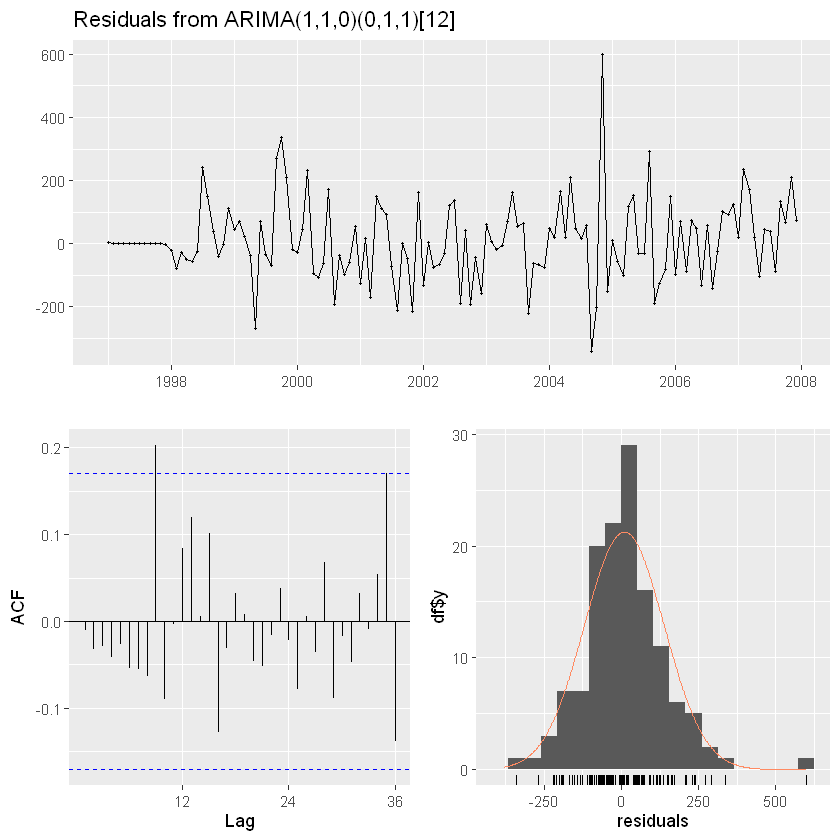

In [127]:
# Calculate and Display the Mean of Residuals
mean_residuals <- mean(residuals(fit_arima3))
print(paste("Mean Residual Value:", round(mean_residuals, 2)))

# Conduct Residual Diagnostics (Autocorrelation & Normality Tests)
checkresiduals(fit_arima3)  # Generates residual plots and statistical tests

# Perform Ljung-Box Test for Autocorrelation in Residuals
ljung_box_test <- Box.test(residuals(fit_arima3), lag = 12, type = "Ljung-Box")

# Display Ljung-Box Test Results
print(ljung_box_test)


----

<div class="alert alert-block alert-warning">
<a id="Comparison"></a>

# Comparison of models (200 words max.) (2 marks)  

Compare your exponential smoothing/ETS model, your ARIMA model, and the basic methods. Which one is your best forecasting method (this will be your final model that is used in the next two sections)? Explain using support from previous questions as well as by creating a plot to compare the forecasts for the test set for the different methods.  
<div>


The ARIMA(1,1,0)(0,1,1)[12] model is identified as the best-performing model. It achieves superior forecasting accuracy on the test set, with RMSE = 159.94 and MAE = 125.09, outperforming all baseline methods, including the Mean Method (RMSE = 1528.5), Drift Method (RMSE = 416), Naïve Method (RMSE = 550.1), and Seasonal Naïve Method (RMSE = 698.7). While it performs slightly better than the Holt-Winters Additive Model (RMSE = 189, MAE = 155.9), it also exhibits a lower MAPE (1.63 vs. 2.0), indicating improved relative accuracy. It also has the lowest MASE of 0.472 compared to all the models tested, confirming its strong predictive ability. Finally, the model’s Theil’s U statistic of 0.3373 further confirms its superiority over naïve forecasting, making ARIMA(1,1,0)(0,1,1)[12] the most suitable choice for YVR energy usage forecasting.

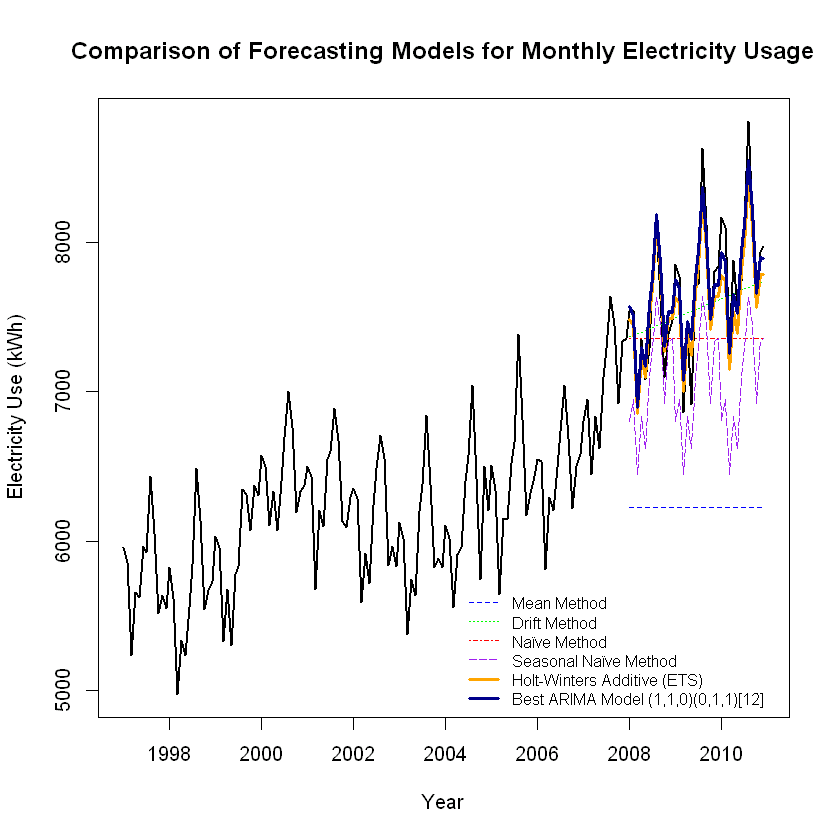

In [131]:
library(forecast)

# Step 1: Plot Actual Energy Usage  
plot(energy_ts, 
     main = "Comparison of Forecasting Models for Monthly Electricity Usage", 
     ylab = "Electricity Use (kWh)", 
     xlab = "Year", 
     col = "black", 
     lwd = 2)

# Step 2: Overlay Basic Benchmark Models  
lines(energyfit1$mean, col = "blue", lwd = 1.5, lty = 2)    # Mean Method (Dotted)
lines(energyfit2$mean, col = "green", lwd = 1.5, lty = 3)   # Drift Method (Dashed)
lines(energyfit3$mean, col = "red", lwd = 1.5, lty = 4)     # Naïve Method (Dot-Dash)
lines(energyfit4$mean, col = "purple", lwd = 1.5, lty = 5)  # Seasonal Naïve Method (Long Dash)

# Step 3: Add Best ETS Model (Holt-Winters Additive)  
lines(etsfit1$mean, col = "orange", lwd = 2.5, lty = 1) 

# Step 4: Overlay Best ARIMA Model (1,1,0)(0,1,1)[12])  
lines(arima3_forecast$mean, col = "darkblue", lwd = 3) 

# Step 5: Adjust Legend for Clarity  
legend("bottomright", 
       lty = c(2,3,4,5,1,1), 
       lwd = c(1.5,1.5,1.5,1.5,2.5,3), 
       col = c("blue", "green", "red", "purple", "orange", "darkblue"), 
       legend = c("Mean Method", "Drift Method", "Naïve Method", "Seasonal Naïve Method",  
                  "Holt-Winters Additive (ETS)", "Best ARIMA Model (1,1,0)(0,1,1)[12]"),  
       bty = "n",  
       cex = 0.8)  


<div class="alert alert-block alert-info"> 
<a id="Forecasts"></a>   
    
# Forecasts (1.25 marks)

Calculate the point forecasts using your final model for the next three years (January 2011 through December 2013).

Plot the entire dataset with the forecasts from your best forecasting method, including prediction intervals.
</div>

    Month Point_Forecast    Lo_80    Hi_80    Lo_95    Hi_95
 Jan 2011       7574.140 7396.282 7751.998 7302.129 7846.150
 Feb 2011       7512.407 7284.548 7740.265 7163.928 7860.886
 Mar 2011       6896.593 6624.162 7169.025 6479.945 7313.242
 Apr 2011       7294.447 6984.425 7604.470 6820.309 7768.586
 May 2011       7168.030 6824.390 7511.670 6642.478 7693.582
 Jun 2011       7587.226 7212.997 7961.455 7014.893 8159.559
 Jul 2011       7758.218 7355.715 8160.722 7142.642 8373.794
 Aug 2011       8191.745 7762.828 8620.663 7535.772 8847.718
 Sep 2011       7857.201 7403.405 8310.998 7163.179 8551.224
 Oct 2011       7302.175 6824.794 7779.556 6572.083 8032.266
 Nov 2011       7541.287 7041.431 8041.142 6776.824 8305.750
 Dec 2011       7532.547 7011.194 8053.901 6735.206 8329.889
 Jan 2012       7754.356 7205.652 8303.059 6915.186 8593.525
 Feb 2012       7691.505 7118.387 8264.622 6814.997 8568.012
 Mar 2012       7075.912 6479.141 7672.683 6163.229 7988.595
 Apr 2012       7473.722

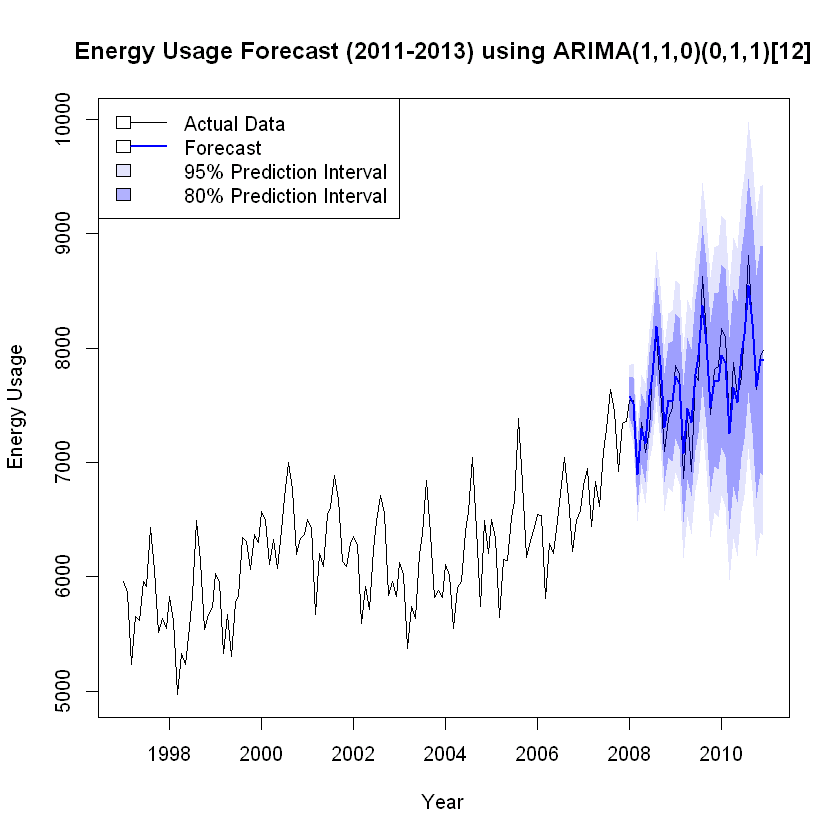

In [134]:
# Generate Forecast Dates (2011-2013)  
forecast_dates <- seq(from = as.Date("2011-01-01"), by = "month", length.out = 36)

# Create Forecast Table with Prediction Intervals  
forecast_table <- data.frame(
  Month = format(forecast_dates, "%b %Y"),  # Format as "Jan 2011", "Feb 2011", etc.
  Point_Forecast = as.numeric(arima3_forecast$mean),
  Lo_80 = as.numeric(arima3_forecast$lower[,1]),  # Lower bound (80% confidence)
  Hi_80 = as.numeric(arima3_forecast$upper[,1]),  # Upper bound (80% confidence)
  Lo_95 = as.numeric(arima3_forecast$lower[,2]),  # Lower bound (95% confidence)
  Hi_95 = as.numeric(arima3_forecast$upper[,2])   # Upper bound (95% confidence)
)

# Display Forecast Table  
print(forecast_table, row.names = FALSE)

# Convert Forecast Data to Time Series Objects  
forecast_ts <- ts(arima3_forecast$mean, start = start(energy_ts_test), frequency = frequency(energy_ts))
lower_95_ts <- ts(arima3_forecast$lower[,2], start = start(energy_ts_test), frequency = frequency(energy_ts))
upper_95_ts <- ts(arima3_forecast$upper[,2], start = start(energy_ts_test), frequency = frequency(energy_ts))
lower_80_ts <- ts(arima3_forecast$lower[,1], start = start(energy_ts_test), frequency = frequency(energy_ts))
upper_80_ts <- ts(arima3_forecast$upper[,1], start = start(energy_ts_test), frequency = frequency(energy_ts))

# Plot Energy Usage Forecast  
plot(energy_ts, type = "n", ylim = range(energy_ts, upper_95_ts), 
     main = "Energy Usage Forecast (2011-2013) using ARIMA(1,1,0)(0,1,1)[12]", 
     xlab = "Year", ylab = "Energy Usage")

# Overlay Actual Energy Usage Data  
lines(energy_ts, col = "black", lwd = 1.5)

# Add Forecasted Values  
lines(forecast_ts, col = "blue", lwd = 2)

# Add 95% Prediction Interval (Light Blue Shading)  
polygon(c(time(forecast_ts), rev(time(forecast_ts))), 
        c(lower_95_ts, rev(upper_95_ts)), 
        col = rgb(0, 0, 1, 0.1), border = NA)

# Add 80% Prediction Interval (Darker Blue Shading)  
polygon(c(time(forecast_ts), rev(time(forecast_ts))), 
        c(lower_80_ts, rev(upper_80_ts)), 
        col = rgb(0, 0, 1, 0.3), border = NA)

# Add Legend for Clarity  
legend("topleft", legend = c("Actual Data", "Forecast", "95% Prediction Interval", "80% Prediction Interval"),
       col = c("black", "blue", rgb(0, 0, 1, 0.1), rgb(0, 0, 1, 0.3)), 
       lwd = c(1.5, 2, NA, NA), fill = c(NA, NA, rgb(0, 0, 1, 0.1), rgb(0, 0, 1, 0.3)))


<div class="alert alert-block alert-warning">
<a id="Discussion"></a>

# Discussion (300 words max.) (3 marks)

Discuss three limitations of this final model, and recommendations to address these limitations. (300 words max.)
<div>


### **Limitations and Potential Improvements of the ARIMA Model**  One problem with the model is that it only looks at past electricity use and ignores other important things that affect energy consumption. In reality, factors like operational changes, economic conditions, new technologies, etc.  also play a big role. Since these are not included, the predictions might not fully match what happens in real life. A simple way to improve this is to consider more useful information when looking at patterns, so the forecast reflects what’s actually going on.

Another issue is that the model assumes past trends will continue the same way, but things change over time. For example, new airport rules, expansions, or economic changes can cause long-term shifts in energy use. To keep up with these changes, the model should be regularly updated with new data, so it doesn’t rely too much on old patterns that may no longer be relevant.

Also, while the model’s errors don’t show any strong patterns, the way they are spread out is slightly uneven. This might mean that some unexpected changes in energy use are not being fully captured. A simple fix would be to adjust how past trends are measured or smooth out sudden jumps in the data to make predictions more stable.

Diagnostic tests confirm that residuals exhibit no significant autocorrelation, but the residual histogram suggests deviations from normality. This indicates that some underlying patterns remain unexplained, which may impact forecast reliability. To address this, hybrid forecasting approaches such as ARIMA-GARCH (to handle volatility clustering) or LSTMs (to capture nonlinear relationships) could be explored.

Overall, the model works well, but it could be better by including more useful factors, updating data often, improving how seasonal patterns are handled, and fine-tuning how trends and surprises are managed. These changes would help make the forecasts more accurate and useful for real-world decision-making..

----

<div class="alert alert-block alert-danger">
<a id="AppendixA"></a>

# Appendix A:
# ETS models (1 mark)
Include the ETS models that you tried and a brief description of why you ruled these out and selected your best ETS model to present above.
</div>

In [140]:
# Since our data exhibits a seasonal pattern, we begin with the Holt-Winters method to capture seasonality.
# Applying the Holt-Winters' additive model, which considers level, trend, and seasonality in an additive way.
# The model is trained on the historical data and generates a 36-step forecast.
# A summary of the fitted model provides details on smoothing parameters and overall model performance.

etsfit1 <- hw(energy_ts_train, seasonal="additive", h=36) 
summary(etsfit1)



Forecast method: Holt-Winters' additive method

Model Information:
Holt-Winters' additive method 

Call:
hw(y = energy_ts_train, h = 36, seasonal = "additive")

  Smoothing parameters:
    alpha = 0.7846 
    beta  = 1e-04 
    gamma = 1e-04 

  Initial states:
    l = 5879.3546 
    b = 12.3652 
    s = -36.7977 -27.2016 -238.1219 321.0426 666.3048 232.4424
           58.5104 -349.8579 -192.2142 -564.3842 38.3341 91.9432

  sigma:  134.6878

     AIC     AICc      BIC 
1955.855 1961.224 2004.863 

Error measures:
                    ME     RMSE      MAE         MPE     MAPE      MASE
Training set -1.171192 126.2613 98.95847 -0.06213835 1.594299 0.3734517
                    ACF1
Training set 0.005411505

Forecasts:
         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2008       7485.996 7313.387 7658.605 7222.013 7749.979
Feb 2008       7444.636 7225.222 7664.050 7109.071 7780.200
Mar 2008       6854.252 6596.383 7112.120 6459.876 7248.627
Apr 2008       7238.806 6947.507 

---

In [143]:
#Holt-Winters' multiplicative method
etsfit2 <- hw(energy_ts_train, seasonal="multiplicative", h=36)
summary(etsfit2)


Forecast method: Holt-Winters' multiplicative method

Model Information:
Holt-Winters' multiplicative method 

Call:
hw(y = energy_ts_train, h = 36, seasonal = "multiplicative")

  Smoothing parameters:
    alpha = 0.4706 
    beta  = 1e-04 
    gamma = 0.0072 

  Initial states:
    l = 5875.9098 
    b = 8.9647 
    s = 0.9826 0.9884 0.9611 1.0515 1.1023 1.0388
           1.0155 0.9525 0.9714 0.9096 1.0082 1.0182

  sigma:  0.0237

     AIC     AICc      BIC 
1978.826 1984.195 2027.834 

Error measures:
                   ME     RMSE      MAE        MPE     MAPE      MASE      ACF1
Training set 5.731122 136.4113 105.8658 0.02292035 1.702491 0.3995188 0.3457665

Forecasts:
         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2008       7517.507 7289.219 7745.795 7168.371 7866.643
Feb 2008       7450.360 7200.345 7700.374 7067.995 7832.724
Mar 2008       6729.247 6483.871 6974.624 6353.977 7104.518
Apr 2008       7196.257 6914.518 7477.997 6765.374 7627.140
May 2008       7

In [145]:
#Damped Holt-Winters' additive method
etsfit3 <- hw(energy_ts_train, h=36, seasonal="additive", damped=TRUE)
summary(etsfit3)


Forecast method: Damped Holt-Winters' additive method

Model Information:
Damped Holt-Winters' additive method 

Call:
hw(y = energy_ts_train, h = 36, seasonal = "additive", damped = TRUE)

  Smoothing parameters:
    alpha = 0.7931 
    beta  = 1e-04 
    gamma = 1e-04 
    phi   = 0.98 

  Initial states:
    l = 5805.4605 
    b = 13.8363 
    s = -38.863 -43.2456 -244.5015 321 668.5009 230.8187
           64.3729 -346.505 -192.5901 -569.7257 56.5732 94.1651

  sigma:  135.8223

     AIC     AICc      BIC 
1958.927 1964.980 2010.817 

Error measures:
                   ME     RMSE      MAE       MPE    MAPE      MASE        ACF1
Training set 9.048528 126.7748 99.15104 0.1037289 1.59089 0.3741784 -0.01026726

Forecasts:
         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2008       7479.370 7305.306 7653.433 7213.163 7745.576
Feb 2008       7442.693 7220.519 7664.866 7102.908 7782.478
Mar 2008       6817.430 6555.841 7079.019 6417.365 7217.495
Apr 2008       7195.566 689

In [147]:
#Damped Holt-Winters' multiplicative method
etsfit4 <- hw(energy_ts_train, h=36, seasonal="multiplicative", damped=TRUE)
summary(etsfit4)


Forecast method: Damped Holt-Winters' multiplicative method

Model Information:
Damped Holt-Winters' multiplicative method 

Call:
hw(y = energy_ts_train, h = 36, seasonal = "multiplicative", 
    damped = TRUE)

  Smoothing parameters:
    alpha = 0.7692 
    beta  = 0.0067 
    gamma = 1e-04 
    phi   = 0.9691 

  Initial states:
    l = 5839.2095 
    b = 13.1174 
    s = 0.9892 0.993 0.9601 1.0494 1.1057 1.0382
           1.0139 0.947 0.9671 0.9063 1.0077 1.0224

  sigma:  0.0221

     AIC     AICc      BIC 
1960.935 1966.988 2012.825 

Error measures:
                   ME     RMSE     MAE       MPE     MAPE      MASE       ACF1
Training set 10.95501 127.3611 99.0056 0.1331349 1.583785 0.3736295 0.03576243

Forecasts:
         Point Forecast    Lo 80    Hi 80    Lo 95     Hi 95
Jan 2008       7591.206 7376.255 7806.158 7262.466  7919.946
Feb 2008       7489.905 7221.530 7758.280 7079.461  7900.349
Mar 2008       6742.556 6458.613 7026.498 6308.303  7176.808
Apr 2008       7201.1

In [149]:
##Allow R to choose the model that fits the training set the best:
sbest <- ets(energy_ts_train)
sbest

ETS(A,N,A) 

Call:
ets(y = energy_ts_train)

  Smoothing parameters:
    alpha = 0.8142 
    gamma = 1e-04 

  Initial states:
    l = 6028.2465 
    s = -53.9951 -35.1353 -238.2527 322.9962 671.4127 226.3734
           66.8415 -359.4489 -191.2235 -589.7391 56.3954 123.7755

  sigma:  133.9544

     AIC     AICc      BIC 
1952.670 1956.808 1995.912 

In [150]:
etsfit5 <- ets(energy_ts_train, model="ANA", damped=FALSE)
summary(etsfit5)

ETS(A,N,A) 

Call:
ets(y = energy_ts_train, model = "ANA", damped = FALSE)

  Smoothing parameters:
    alpha = 0.8142 
    gamma = 1e-04 

  Initial states:
    l = 6028.2465 
    s = -53.9951 -35.1353 -238.2527 322.9962 671.4127 226.3734
           66.8415 -359.4489 -191.2235 -589.7391 56.3954 123.7755

  sigma:  133.9544

     AIC     AICc      BIC 
1952.670 1956.808 1995.912 

Training set error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE       ACF1
Training set 12.73609 126.6517 98.09986 0.1709555 1.569775 0.3702114 -0.0144411

In [151]:
# Comparing the Performance of Different Forecasting Models

# Define the forecasting models being evaluated
forecast_models <- c("Holt-Winters Additive (Seasonal)", 
                     "Holt-Winters Multiplicative (Seasonal)", 
                     "Holt-Winters Additive Damped (Additive Trend)", 
                     "Holt-Winters Multiplicative Damped (Additive Trend)", 
                     "ETS(A,N,A) - Automatically Selected")

# Compute accuracy metrics (MAE, RMSE, MASE, and sMAPE) for each model on the test set
model_comparison <- cbind(
  forecast_models, 
  round(
    rbind(
      accuracy(forecast(etsfit1, 36), energy_ts_test)[2, c(2,3,5,6)],  # Additive Holt-Winters
      accuracy(forecast(etsfit2, 36), energy_ts_test)[2, c(2,3,5,6)],  # Multiplicative Holt-Winters
      accuracy(forecast(etsfit3, 36), energy_ts_test)[2, c(2,3,5,6)],  # Additive Holt-Winters Damped
      accuracy(forecast(etsfit4, 36), energy_ts_test)[2, c(2,3,5,6)],  # Multiplicative Holt-Winters Damped
      accuracy(forecast(etsfit5, 36), energy_ts_test)[2, c(2,3,5,6)]   # ETS(A,N,A) - Auto-selected by R
    ), 2
  )
)

# Display the accuracy comparison of all models
model_comparison


forecast_models,RMSE,MAE,MAPE,MASE
Holt-Winters Additive (Seasonal),189,155.9,2,0.59
Holt-Winters Multiplicative (Seasonal),243.61,203.89,2.62,0.77
Holt-Winters Additive Damped (Additive Trend),381.18,312.72,3.97,1.18
Holt-Winters Multiplicative Damped (Additive Trend),279.92,233.9,3,0.88
"ETS(A,N,A) - Automatically Selected",386.41,315.94,4.01,1.19


<div class="alert alert-block alert-danger">
<a id="AppendixB"></a>

# Appendix B:
# ARIMA Models (1 mark)
Include the ARIMA models that you tried and a brief description of why you ruled these out and selected your best ARIMA model to present above.
</div>

## ARIMA Model Selection and Test Set Error Comparison  

**Model 1**, generated by `auto_arima`, was eliminated due to **visually inaccurate forecasts** and the **highest training and test errors** across all metrics. The model’s complexity, with a **seasonal AR order of 2**, likely made it unsuitable for the dataset.  

**Model 2** had **lower training error than Model 3** in some metrics, such as **RMSE and AICc**, but was ruled out due to **higher test errors across all metrics**, indicating weaker predictive accuracy.  

**Model 4** had a **slightly lower RMSE than Model 3**, but its **overall test accuracy was marginally worse**, leading to its exclusion.  

Based on test set performance, **Model 3 (ARIMA(1,1,0)(0,1,1)[12])** was selected as the **best model** due to its **balanced accuracy** across all error metrics, particularly **RMSE (159.94), MAE (125.09), and Theil’s U (0.3373)**.  

### ARIMA Model Test Set Error Comparison  

| Model                          | ME      | RMSE   | MAE    | MPE     | MAPE   | MASE   | ACF1   | Theil’s U |
|--------------------------------|---------|--------|--------|---------|--------|--------|--------|-----------|
| **Model 1:** ARIMA(1,1,0)(2,1,0)[12]  | -459.57 | 523.03 | 459.58 | -5.9855 | 5.9855 | 1.7343 | 0.6253 | 1.1012 |
| **Model 2:** ARIMA(0,1,1)(0,1,1)[12]  | 8.735   | 161.63 | 128.23 | 0.0328  | 1.6684 | 0.4839 | 0.2380 | 0.3400 |
| **Model 3:** ARIMA(1,1,0)(0,1,1)[12]  | -9.2435 | 159.94 | 125.09 | -0.2000 | 1.6338 | 0.4721 | 0.2242 | 0.3373 |
| **Model 4:** ARIMA(1,1,1)(0,1,1)[12]  | 5.0942  | 161.11 | 127.50 | -0.0142 | 1.6602 | 0.4812 | 0.2351 | 0.3391 |  

The **ARIMA(1,1,0)(0,1,1)[12]** model provides the **best trade-off between accuracy and complexity**, making it the preferred forecasting model.



 ARIMA(0,1,0)(0,1,0)[12]                    : 1576.446
 ARIMA(0,1,0)(0,1,1)[12]                    : Inf
 ARIMA(0,1,0)(0,1,2)[12]                    : Inf
 ARIMA(0,1,0)(1,1,0)[12]                    : 1554.001
 ARIMA(0,1,0)(1,1,1)[12]                    : Inf
 ARIMA(0,1,0)(1,1,2)[12]                    : Inf
 ARIMA(0,1,0)(2,1,0)[12]                    : 1553.326
 ARIMA(0,1,0)(2,1,1)[12]                    : Inf
 ARIMA(0,1,0)(2,1,2)[12]                    : Inf
 ARIMA(0,1,1)(0,1,0)[12]                    : 1569.347
 ARIMA(0,1,1)(0,1,1)[12]                    : Inf
 ARIMA(0,1,1)(0,1,2)[12]                    : Inf
 ARIMA(0,1,1)(1,1,0)[12]                    : 1550.491
 ARIMA(0,1,1)(1,1,1)[12]                    : Inf
 ARIMA(0,1,1)(1,1,2)[12]                    : Inf
 ARIMA(0,1,1)(2,1,0)[12]                    : 1548.359
 ARIMA(0,1,1)(2,1,1)[12]                    : Inf
 ARIMA(0,1,1)(2,1,2)[12]                    : Inf
 ARIMA(0,1,2)(0,1,0)[12]                    : 1571.448
 ARIMA(0,1,2)(

Series: energy_ts_train 
ARIMA(1,1,0)(2,1,0)[12] 

Coefficients:
          ar1     sar1     sar2
      -0.2482  -0.4993  -0.2136
s.e.   0.0909   0.0937   0.1006

sigma^2 = 24330:  log likelihood = -769.95
AIC=1547.9   AICc=1548.25   BIC=1559.01

Training set error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE
Training set 9.902709 146.2229 104.9458 0.1326502 1.668495 0.3960468
                     ACF1
Training set -0.008078189

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,9.902709,146.2229,104.9458,0.1326502,1.668495,0.3960468,-0.008078189,NA
Test set,-459.577317,532.0309,459.5773,-5.9855995,5.985599,1.7343631,0.625382643,1.101258


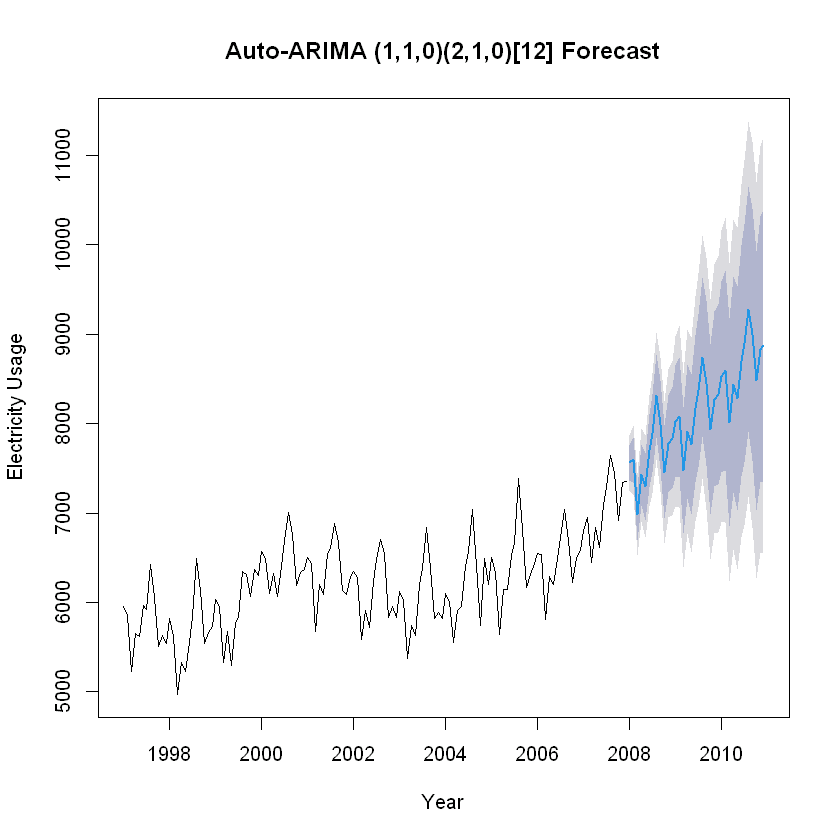

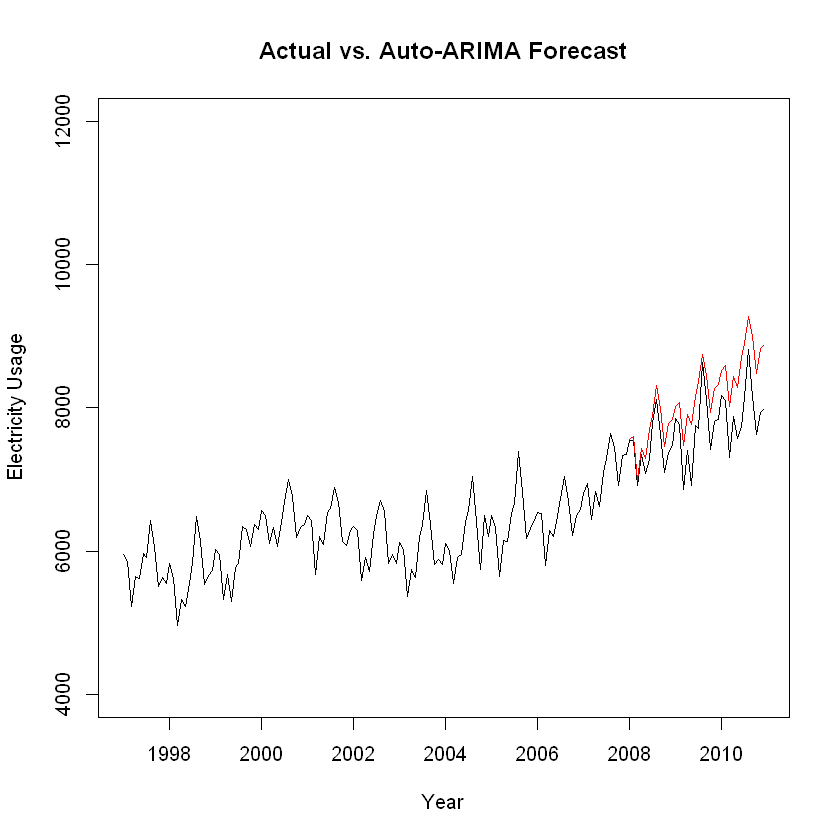


	Ljung-Box test

data:  Residuals from ARIMA(1,1,0)(2,1,0)[12]
Q* = 22.208, df = 21, p-value = 0.3876

Model df: 3.   Total lags used: 24



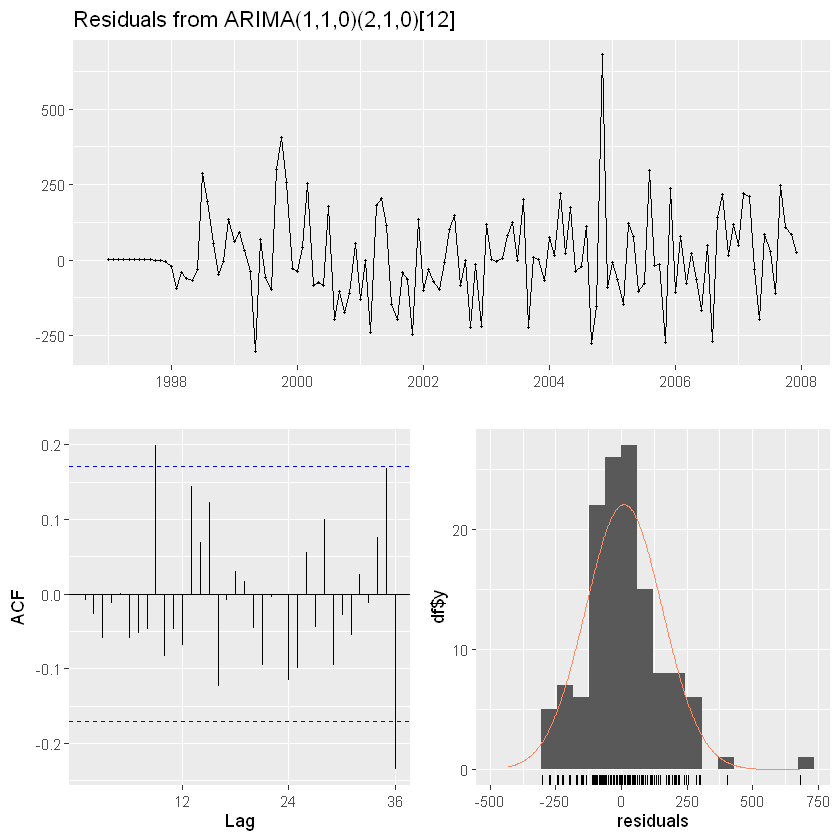

In [155]:
# Model 1: Auto-Selected ARIMA Model (ARIMA(1,1,0)(2,1,0)[12])

# Automatically identify the best ARIMA model with seasonal components
fit_auto_arima <- auto.arima(
  energy_ts_train,
  seasonal = TRUE,       # Enable seasonal ARIMA selection
  stepwise = FALSE,      # Exhaustive search instead of stepwise selection
  approximation = FALSE, # Perform exact likelihood estimation
  trace = TRUE           # Display detailed model selection process
)

# Display Model Summary
summary(fit_auto_arima)

# Generate 36-Month Forecasts
forecast_auto_arima <- forecast(fit_auto_arima, h = 36)

# Plot the Forecast
plot(forecast_auto_arima, 
     main = "Auto-ARIMA (1,1,0)(2,1,0)[12] Forecast",
     ylab = "Electricity Usage",
     xlab = "Year")

# Evaluate Forecast Accuracy Against the Test Set
accuracy(forecast_auto_arima, energy_ts_test)

# Visualizing Actual vs. Forecasted Data
plot(energy_ts, ylim = c(4000, 12000), 
     main = "Actual vs. Auto-ARIMA Forecast",
     ylab = "Electricity Usage", 
     xlab = "Year")

# Overlay Forecasted Values in Red
lines(forecast_auto_arima$mean, col = "red")

# Residual Diagnostics to Check Model Fit
checkresiduals(fit_auto_arima)


Warning message in Arima(energy_ts_train, order = c(0, 1, 1), seasonal = list(order = c(0, :
"No drift term fitted as the order of difference is 2 or more."


Series: energy_ts_train 
ARIMA(0,1,1)(0,1,1)[12] 

Coefficients:
          ma1     sma1
      -0.2021  -0.9006
s.e.   0.0909   0.1912

sigma^2 = 18710:  log likelihood = -762.5
AIC=1531   AICc=1531.21   BIC=1539.33

Training set error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE
Training set 9.851918 128.7797 94.25649 0.1303166 1.499484 0.3557073
                     ACF1
Training set -0.006835481

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,9.851918,128.7797,94.25649,0.13031662,1.499484,0.3557073,-0.006835481,NA
Test set,8.735463,161.6306,128.23037,0.03287632,1.668487,0.4839186,0.238025666,0.3400212


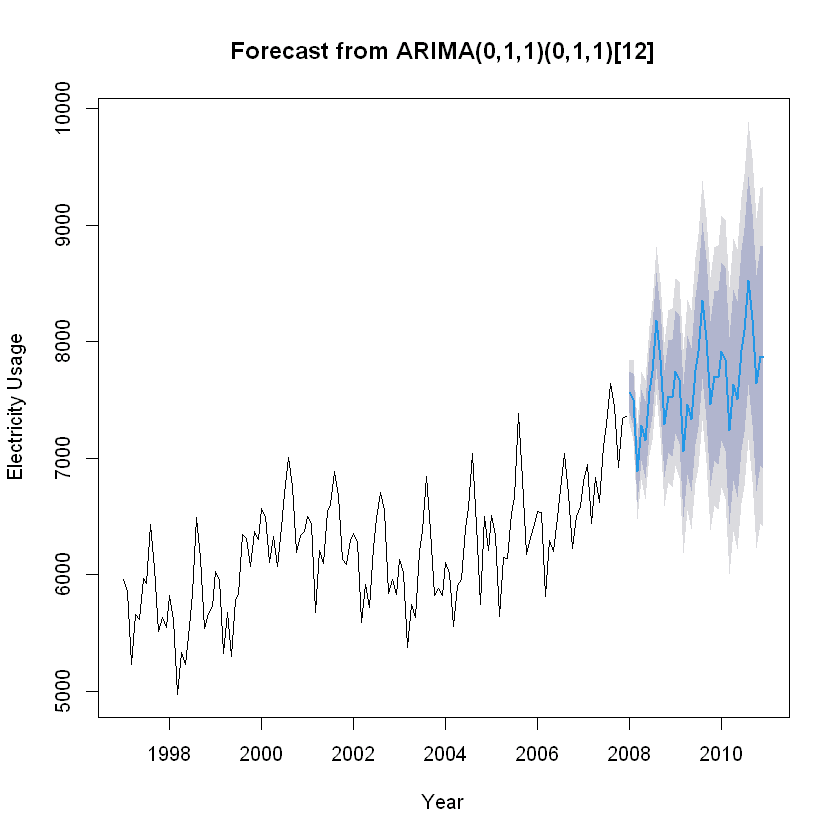

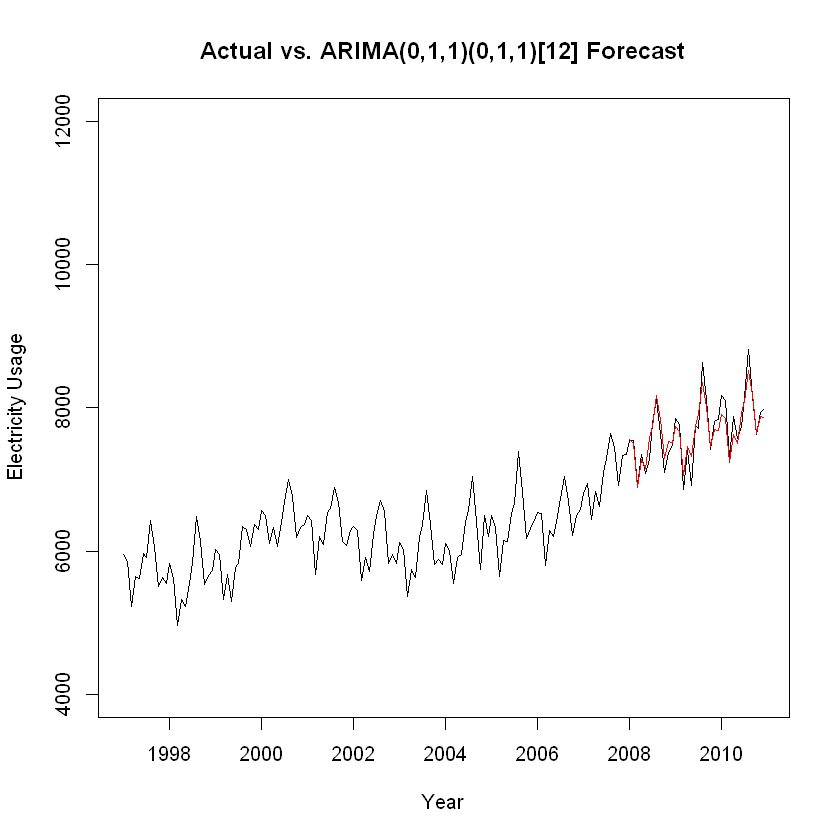


	Ljung-Box test

data:  Residuals from ARIMA(0,1,1)(0,1,1)[12]
Q* = 17.582, df = 22, p-value = 0.7305

Model df: 2.   Total lags used: 24



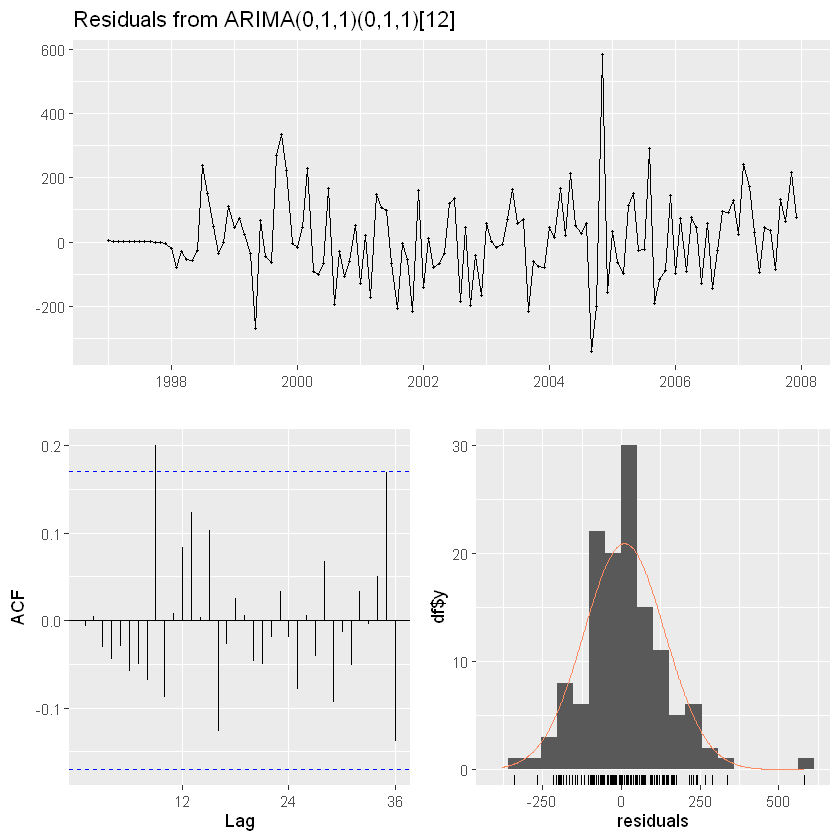

In [156]:
# Model 2: ARIMA(0,1,1)(0,1,1)[12] with Drift  

# Fit the ARIMA model with specified orders and seasonal components  
fit_arima2 <- Arima(
  energy_ts_train,
  order = c(0, 1, 1),                # Non-seasonal ARIMA(p,d,q) components  
  seasonal = list(order = c(0, 1, 1), # Seasonal ARIMA(P,D,Q) components  
                  period = 12),       # Seasonal period of 12 (monthly data)  
  include.drift = TRUE               # Include drift to account for trend  
)

# Display Model Summary  
summary(fit_arima2)

# Generate Forecasts for the Next 36 Months  
arima2_forecast <- forecast(fit_arima2, h = 36)

# Plot the Forecast  
plot(arima2_forecast,  
     main = "Forecast from ARIMA(0,1,1)(0,1,1)[12]",  
     ylab = "Electricity Usage",  
     xlab = "Year")

# Evaluate Forecast Accuracy Against the Test Set  
accuracy(arima2_forecast, energy_ts_test)

# Visualizing Actual vs. Forecasted Data  
plot(energy_ts, ylim = c(4000, 12000),  
     main = "Actual vs. ARIMA(0,1,1)(0,1,1)[12] Forecast",  
     ylab = "Electricity Usage",  
     xlab = "Year")

# Overlay Forecasted Values in Red  
lines(arima2_forecast$mean, col = "red")

# Perform Residual Diagnostics to Check Model Fit  
checkresiduals(fit_arima2)


Warning message in Arima(energy_ts_train, order = c(1, 1, 1), seasonal = list(order = c(0, :
"No drift term fitted as the order of difference is 2 or more."


Series: energy_ts_train 
ARIMA(1,1,1)(0,1,1)[12] 

Coefficients:
          ar1      ma1     sma1
      -0.0344  -0.1684  -0.8989
s.e.   0.6015   0.5979   0.1909

sigma^2 = 18893:  log likelihood = -762.5
AIC=1532.99   AICc=1533.35   BIC=1544.11

Training set error measures:
                   ME     RMSE      MAE       MPE    MAPE      MASE
Training set 9.795053 128.8534 94.24395 0.1295788 1.49931 0.3556599
                     ACF1
Training set -0.005888069

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,9.795053,128.8534,94.24395,0.12957876,1.499310,0.3556599,-0.005888069,NA
Test set,5.094001,161.1088,127.49758,-0.01428101,1.660227,0.4811532,0.235147004,0.3391219


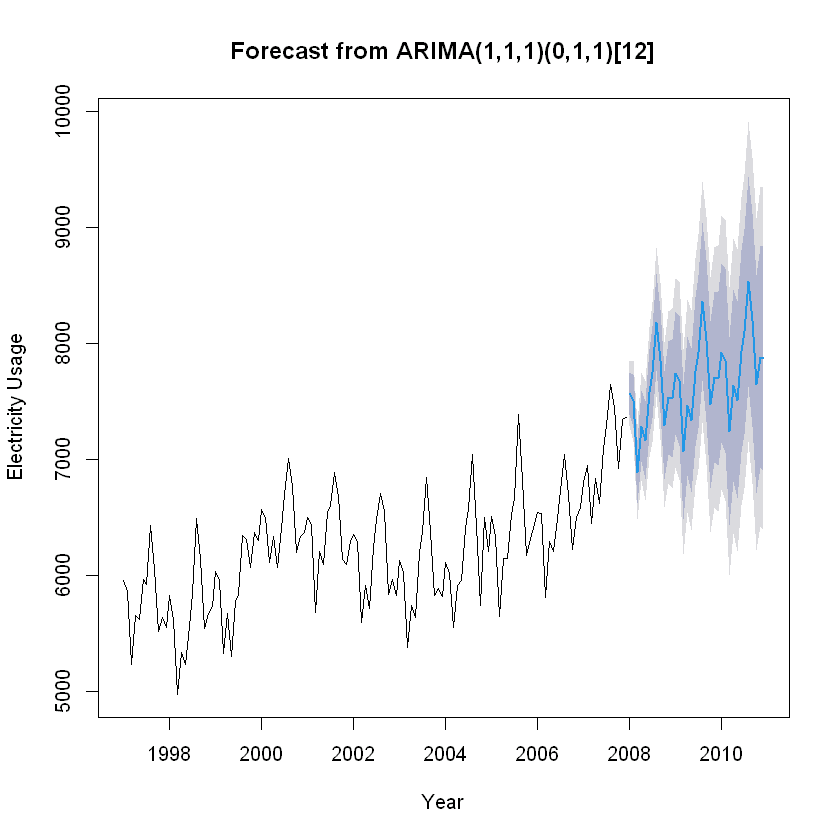

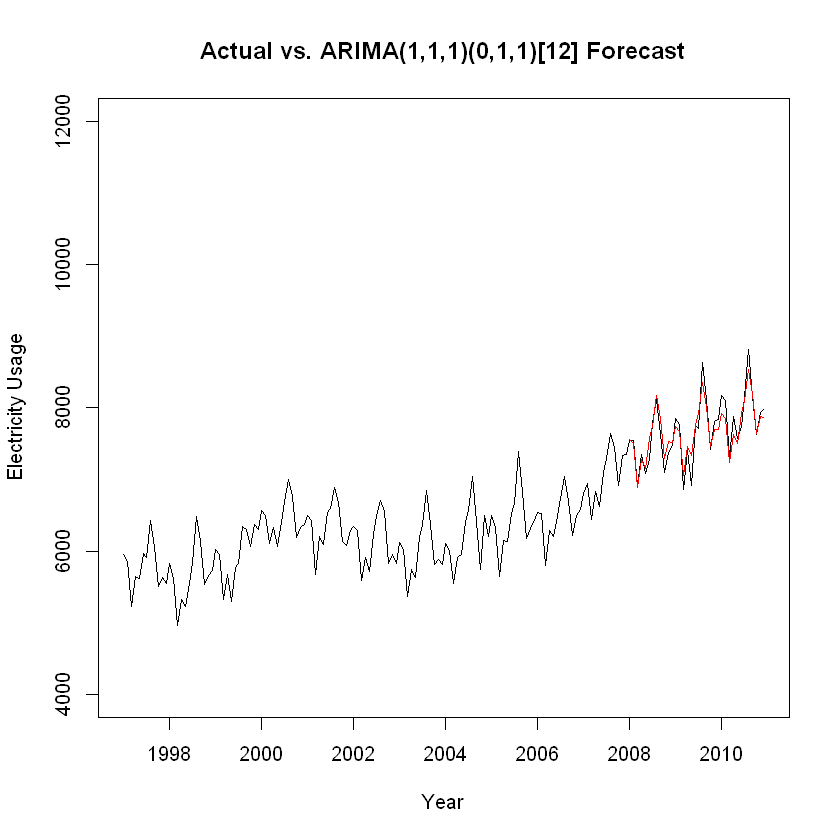


	Ljung-Box test

data:  Residuals from ARIMA(1,1,1)(0,1,1)[12]
Q* = 17.561, df = 21, p-value = 0.6766

Model df: 3.   Total lags used: 24



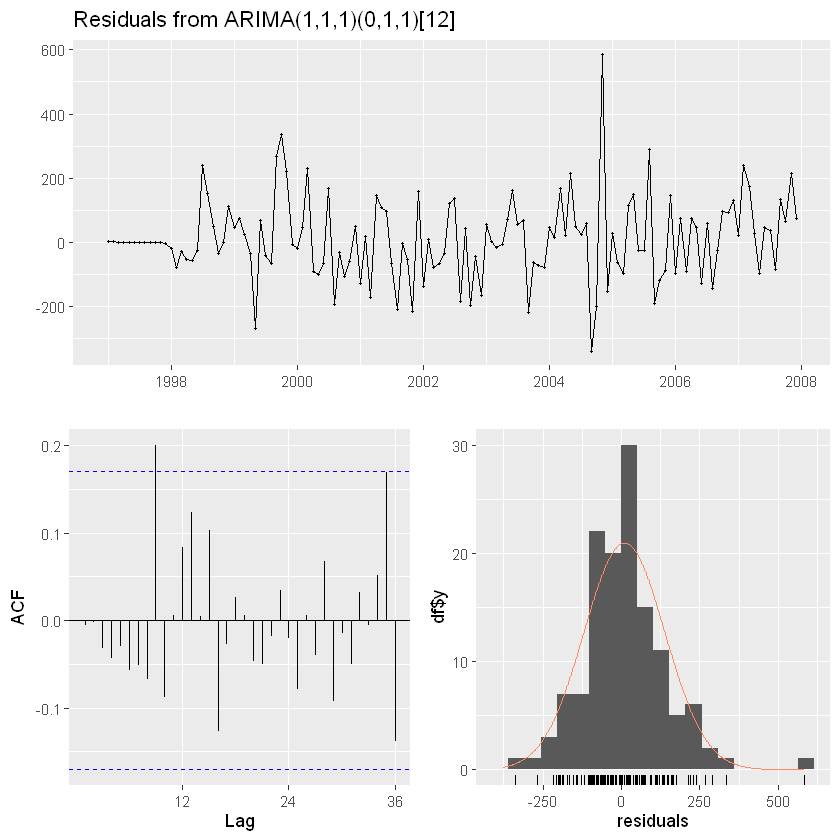

In [157]:
# Model 4: ARIMA(1,1,1)(0,1,1)[12] with Drift  

# Fit the ARIMA model with specified non-seasonal and seasonal components  
fit_arima4 <- Arima(
  energy_ts_train,
  order = c(1, 1, 1),                # Non-seasonal ARIMA(p,d,q) components  
  seasonal = list(order = c(0, 1, 1), # Seasonal ARIMA(P,D,Q) components  
                  period = 12),       # Seasonal period of 12 (monthly data)  
  include.drift = TRUE               # Include drift to account for trend  
)

# Display Model Summary  
summary(fit_arima4)

# Generate Forecasts for the Next 36 Months  
arima4_forecast <- forecast(fit_arima4, h = 36)

# Plot the Forecast  
plot(arima4_forecast,  
     main = "Forecast from ARIMA(1,1,1)(0,1,1)[12]",  
     ylab = "Electricity Usage",  
     xlab = "Year")

# Evaluate Forecast Accuracy Against the Test Set  
accuracy(arima4_forecast, energy_ts_test)

# Visualizing Actual vs. Forecasted Data  
plot(energy_ts, ylim = c(4000, 12000),  
     main = "Actual vs. ARIMA(1,1,1)(0,1,1)[12] Forecast",  
     ylab = "Electricity Usage",  
     xlab = "Year")

# Overlay Forecasted Values in Red  
lines(arima4_forecast$mean, col = "red")

# Perform Residual Diagnostics to Check Model Fit  
checkresiduals(fit_arima4)
